# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
d2022=pd.read_excel('/content/drive/MyDrive/관광공모전/원본데이터/2022.xlsx')
d2023=pd.read_excel('/content/drive/MyDrive/관광공모전/원본데이터/2023.xlsx')
d2024=pd.read_excel('/content/drive/MyDrive/관광공모전/원본데이터/2024.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/관광공모전/원본데이터/2022.xlsx'

In [ ]:
d2024.shape

(16216, 402)

In [ ]:
d2024.columns

Index(['pnid', 'MVIT', 'RVIT', 'XRVIT', 'TYP', 'Q1', 'Q1_1a1', 'Q1_1a2',
       'Q1_1a3', 'Q2a1',
       ...
       'D_SEX', 'D_AGE', 'D_MOK', 'D_NUM', 'D_GUB', 'weight1', 'weight2',
       'weight3', 'weight4', 'weight'],
      dtype='object', length=402)

In [ ]:
d2024.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,NaN,NaN,...,여 성,50 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",과거 방문 경험이 좋아서,일본,...,여 성,40 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",과거 방문 경험이 좋아서,"한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",일본,...,여 성,30 대,여 가/위 락/ 휴 식,3 회,개 별 여 행,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,...,남 성,20 대,여 가/위 락/ 휴 식,1 회,개 별 여 행,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",홍콩,...,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,876.796936,NaN,NaN,NaN,876.796936


In [ ]:
d2024['D_NAT'].unique()

array(['    인  도  네  시  아', '    대              만',
       '    중              국', '    기              타',
       '    말  레  이  시  아', '    필      리      핀', '    싱   가    포   르',
       '    독              일', '    일              본',
       '    미              국', '    러      시      아',
       '    몽              골', '    홍              콩',
       '    프      랑      스', '    태              국',
       '    중              동', '    인              도',
       '    호              주', '    영              국',
       '    베      트      남', '    캐      나      다'], dtype=object)

# 왜 다른 나라가 아닌 한국을 방문해야하는가??



**[고려한 컬럼]**
- 한국 여행 관심 계기(Q1_1a1~Q1_1a3)

    ➡️한국에 관심을 갖게 된 계기
- 방문을 고려한 아시아 국가(Q2a1~Q2_adk)
    - 해당 국가 관심 계기(Q2_1a1~Q2_1a3)

    ➡️응답자가 고려했던 다른 아시아 국가들과, 그 나라에 관심을 갖게 된 이유
- 고려한 관광활동(Q3_1a1~Q3_1a3)
- 참여한 활동(Q8a01~Q8a19)
    ✅고려한 활동과 참여한 활동이 달랐다면 이유를 파악하는것이 중요할 듯
    - 교통이 불편해서?
    - 생각보다 너무 비싸서?
    - 다른활동이 더 재밌어보여서??
- 만족한 활동(Q8_1a1~Q8_1a3)

    ➡️ 경쟁력 있는 분야 확인 가능
- 가장 좋았던 곳(서술형)
    
    ✅ 키워드 분석, 텍스트 마이닝 활용 가능 질문
- 재방문 의사(Q13)

## 1. 한국 여행 관심 계기(Q1)

In [ ]:
d2023['Q1_1a1'].unique()

array([ 2., nan,  8.,  4.,  1.,  7.,  5., 11.,  9.,  3.,  6., 10.])

In [ ]:
import pandas as pd
import plotly.express as px

# 관심 계기 컬럼들
interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# 2023년 데이터 처리
interest_2023 = pd.concat([d2023[col] for col in interest_cols], ignore_index=True)
interest_2023 = interest_2023.dropna()
interest_2023 = interest_2023.value_counts().reset_index()
interest_2023.columns = ['관심 계기', '응답 수']
interest_2023['연도'] = '2023'

# 2024년 데이터 처리
interest_2024 = pd.concat([d2024[col] for col in interest_cols], ignore_index=True)
interest_2024 = interest_2024.dropna()
interest_2024 = interest_2024.value_counts().reset_index()
interest_2024.columns = ['관심 계기', '응답 수']
interest_2024['연도'] = '2024'

# 두 연도 데이터 결합
combined = pd.concat([interest_2023, interest_2024], ignore_index=True)

# 시각화
fig = px.bar(
    combined,
    x='관심 계기',
    y='응답 수',
    color='연도',
    barmode='group',
    title='연도별 한국 여행 관심 계기 비교 (2023 vs 2024)',
    text='응답 수'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='', yaxis_title='응답 수', xaxis_tickangle=-30)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# 관심 계기 매핑
interest_mapping = {
    1: '새로운 국가에 가고 싶어서',
    2: '과거 방문 경험이 좋아서',
    3: '한국에서 행사(가족행사, 스포츠 등)가 있어서',
    4: '계획한 여행 경비에 적합한 여행지여서',
    5: '이동거리/비행시간이 적합해서',
    6: '한국에 가는 다양한 항공 노선이 있어서',
    7: '한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서',
    8: '한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서',
    9: '한국의 다양한 관광지 관련 정보를 접하고 나서',
    10: '한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서',
    11: '기타'
}

# 관심 계기 컬럼
interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# 함수: 순위 집계 및 시각화
def plot_interest_ranking(df, year):
    series = pd.concat([df[col] for col in interest_cols], ignore_index=True).dropna()
    series = series.astype(int).map(interest_mapping)
    counts = series.value_counts().reset_index()
    counts.columns = ['관심 계기', '응답 수']

    fig = px.bar(
        counts,
        x='관심 계기',
        y='응답 수',
        title=f'{year}년 한국 여행 관심 계기 순위',
        text='응답 수'
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-30)
    fig.show()

# 실행
plot_interest_ranking(d2023, 2023)
plot_interest_ranking(d2024, 2024)


In [ ]:
import pandas as pd
import plotly.express as px

# 매핑 딕셔너리
interest_mapping = {
    1: "새로운 국가에 가고 싶어서",
    2: "과거 방문 경험이 좋아서",
    3: "한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",
    4: "계획한 여행 경비에 적합한 여행지여서",
    5: "이동거리/비행시간이 적합해서",
    6: "한국에 가는 다양한 항공 노선이 있어서",
    7: "한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",
    8: "한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",
    9: "한국의 다양한 관광지 관련 정보를 접하고 나서",
    10: "한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",
    11: "기타"
}

# 관심 계기 컬럼들
interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# 연도별 데이터 집계 함수
def get_interest_df(df, year):
    series = pd.concat([df[col] for col in interest_cols], ignore_index=True).dropna()
    series = series.astype(int).map(interest_mapping)
    counts = series.value_counts().reset_index()
    counts.columns = ['관심 계기', '응답 수']
    counts['연도'] = year
    return counts

# 각각 처리
interest_2023 = get_interest_df(d2023, '2023')
interest_2024 = get_interest_df(d2024, '2024')

# 병합
combined = pd.concat([interest_2023, interest_2024], ignore_index=True)

# 연도 컬럼의 순서를 명시적으로 지정
combined['연도'] = pd.Categorical(combined['연도'], categories=['2023', '2024'], ordered=True)

# 내림차순 정렬
sorted_combined = combined.sort_values(by='응답 수', ascending=False)

# 시각화
fig = px.bar(
    sorted_combined,
    x='관심 계기',
    y='응답 수',
    color='연도',
    barmode='group',
    title='연도별 한국 여행 관심 계기 (응답 수 내림차순)',
    text='응답 수'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='관심 계기',
    yaxis_title='응답 수',
    xaxis_tickangle=-30,
    showlegend=True
)

fig.show()


'새로운 국가에 가고싶어서 & 과거 방문 경험이 좋아서' 선택지를 제외한 다른 계기들은 모두 전년도보다 상승세

**감소한 이유가 뭘까?**

<새로운 국가에 가고 싶어서>

한국을 이미 다녀온 사람들이 많아져서 한국이 더 이상 '새로운 국가'가 아닌 것

즉, 재방문객 비중이 높아진 경우가 많을 것

<과거 방문 경험이 좋아서>
1. 불만족 가능성
2. 재방문객 감소 -> 이것은 새로운 국가에 가고싶어서 항목이 줄어든 이유와 상반됨

➡️ RVIT 검증

In [ ]:
import pandas as pd
import plotly.express as px

# RVIT 그룹 크기 계산 함수
def get_rvit_distribution(df, year):
    total = len(df)
    rvit_counts = df['RVIT'].apply(lambda x: '1회 방문' if x == 1 else '2회 이상 방문').value_counts().reset_index()
    rvit_counts.columns = ['방문 그룹', '인원 수']
    rvit_counts['비율'] = (rvit_counts['인원 수'] / total) * 100
    rvit_counts['연도'] = year
    return rvit_counts

# 각 연도 계산
rvit_2023 = get_rvit_distribution(d2023, '2023')
rvit_2024 = get_rvit_distribution(d2024, '2024')

# 병합
rvit_all = pd.concat([rvit_2023, rvit_2024], ignore_index=True)

# 시각화
fig = px.bar(
    rvit_all,
    x='연도',
    y='비율',
    color='방문 그룹',
    barmode='group',
    text='비율',
    title='연도별 한국 방문자 RVIT(방문 횟수) 분포'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis_title='비율 (%)', xaxis_title='연도')
fig.show()


In [ ]:
one_2024 = (d2024['RVIT'] == 1).sum()
total_2024 = len(d2024)
print(one_2024 / total_2024 * 100)  # → 이 값이 52.0% 나오면 확정!

47.96497286630488


재방문자: + 0.8%
신규방문자: - 0.8%

In [ ]:
# 관심 계기 매핑
interest_mapping = {
    1: "새로운 국가에 가고 싶어서",
    2: "과거 방문 경험이 좋아서"
}
interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# 항목 선택률 계산 함수
def get_interest_rate(df, year, rvit_group_name, rvit_cond):
    group_df = df[rvit_cond]
    n_respondents = len(group_df)

    # 관심 계기 전체 응답 시리즈
    series = pd.concat([group_df[col] for col in interest_cols], ignore_index=True).dropna()
    series = series.astype(int)

    # 두 항목만 필터링
    counts = series[series.isin([1, 2])].value_counts().reset_index()
    counts.columns = ['코드', '응답 수']
    counts['관심 계기'] = counts['코드'].map(interest_mapping)
    counts['선택률'] = counts['응답 수'] / n_respondents * 100
    counts['연도'] = year
    counts['방문 그룹'] = rvit_group_name
    return counts[['연도', '방문 그룹', '관심 계기', '선택률']]

# 4개 그룹 계산
data = []
data.append(get_interest_rate(d2023, '2023', '1회 방문', d2023['RVIT'] == 1))
data.append(get_interest_rate(d2023, '2023', '2회 이상 방문', d2023['RVIT'] >= 2))
data.append(get_interest_rate(d2024, '2024', '1회 방문', d2024['RVIT'] == 1))
data.append(get_interest_rate(d2024, '2024', '2회 이상 방문', d2024['RVIT'] >= 2))
rate_df = pd.concat(data, ignore_index=True)

# 시각화
fig = px.bar(
    rate_df,
    x='관심 계기',
    y='선택률',
    color='방문 그룹',
    barmode='group',
    facet_col='연도',
    text='선택률',
    title='연도별 방문그룹 내 관심 계기 선택률 비교'
)
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(yaxis_title='선택률 (%)', xaxis_title='관심 계기')
fig.show()


방문자는 늘었지만, 과거 방문 경험이 좋아서에 응답한 비중은 감소

In [ ]:
import pandas as pd
import plotly.express as px

# ✅ 관심 계기 매핑 딕셔너리
interest_mapping = {
    1: "새로운 국가에 가고 싶어서",
    2: "과거 방문 경험이 좋아서",
    3: "한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",
    4: "계획한 여행 경비에 적합한 여행지여서",
    5: "이동거리/비행시간이 적합해서",
    6: "한국에 가는 다양한 항공 노선이 있어서",
    7: "한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",
    8: "한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",
    9: "한국의 다양한 관광지 관련 정보를 접하고 나서",
    10: "한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",
    11: "기타"
}

# ✅ 관심 계기 컬럼들
interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# ✅ 그룹별 관심 계기 집계 함수
def get_interest_by_rvit_group(df, group_name, rvit_condition):
    group_df = df[rvit_condition]
    series = pd.concat([group_df[col] for col in interest_cols], ignore_index=True).dropna()
    series = series.astype(int).map(interest_mapping)
    counts = series.value_counts().reset_index()
    counts.columns = ['관심 계기', '응답 수']
    counts['방문 그룹'] = group_name
    return counts

# ✅ RVIT 기준으로 그룹 나누기 (2023년 기준)
rvit_1 = get_interest_by_rvit_group(d2023, '1회 방문', d2023['RVIT'] == 1)
rvit_2plus = get_interest_by_rvit_group(d2023, '2회 이상 방문', d2023['RVIT'] >= 2)

# ✅ 데이터 병합
rvit_combined = pd.concat([rvit_1, rvit_2plus], ignore_index=True)

# ✅ 시각화
fig = px.bar(
    rvit_combined,
    x='관심 계기',
    y='응답 수',
    color='방문 그룹',
    barmode='group',
    title='2023년 방문횟수별 한국 여행 관심 계기',
    text='응답 수'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-30, xaxis_title='', yaxis_title='응답 수')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# ✅ 관심 계기 매핑 딕셔너리
interest_mapping = {
    1: "새로운 국가에 가고 싶어서",
    2: "과거 방문 경험이 좋아서",
    3: "한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",
    4: "계획한 여행 경비에 적합한 여행지여서",
    5: "이동거리/비행시간이 적합해서",
    6: "한국에 가는 다양한 항공 노선이 있어서",
    7: "한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",
    8: "한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서",
    9: "한국의 다양한 관광지 관련 정보를 접하고 나서",
    10: "한국의 가성비 높은 여행 상품(패키지, 항공권 등)을 접하고 나서",
    11: "기타"
}

# ✅ 관심 계기 컬럼들
interest_cols = ['Q1_1a1', 'Q1_1a2', 'Q1_1a3']

# ✅ 그룹별 관심 계기 집계 함수
def get_interest_by_rvit_group(df, group_name, rvit_condition):
    group_df = df[rvit_condition]
    series = pd.concat([group_df[col] for col in interest_cols], ignore_index=True).dropna()
    series = series.astype(int).map(interest_mapping)
    counts = series.value_counts().reset_index()
    counts.columns = ['관심 계기', '응답 수']
    counts['방문 그룹'] = group_name
    return counts

# ✅ RVIT 기준으로 그룹 나누기 (2024년 기준 예시, 2023도 동일 방식 적용 가능)
rvit_1 = get_interest_by_rvit_group(d2024, '1회 방문', d2024['RVIT'] == 1)
rvit_2plus = get_interest_by_rvit_group(d2024, '2회 이상 방문', d2024['RVIT'] >= 2)

# ✅ 데이터 병합
rvit_combined = pd.concat([rvit_1, rvit_2plus], ignore_index=True)

# ✅ 시각화
fig = px.bar(
    rvit_combined,
    x='관심 계기',
    y='응답 수',
    color='방문 그룹',
    barmode='group',
    title='2024년 방문횟수별 한국 여행 관심 계기',
    text='응답 수'
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-30, xaxis_title='', yaxis_title='응답 수')

fig.show()


하지만 2023년도에 비해서 2024년도의 다른 관심계기에 응한 2회이상 방문객들의 응답수가 늘어난 것으로 보아,

재방문자들이 단순 만족 경험에 의존해 한국을 찾기보다는, 한류 콘텐츠, 전통문화, 관광지 정보, 가성비등 그들의 재방문 동기가 점차 다변화되고 있는 것으로 추측해봄

---
⏹️ 연령/국가별 과거경험 응답률 차이 살펴보기

⏹️ 만족도 항목(Q8)에서 재방문자 비율 확인해보기

## 2. 방문을 고려한 아시아 국가(Q2)

In [ ]:
import pandas as pd
import plotly.express as px

# ✅ 국가 코드 매핑
country_cols = ['Q2a1', 'Q2a2', 'Q2a3']
country_mapping = {
    1: '일본', 2: '중국', 3: '대만', 4: '홍콩', 5: '싱가포르',
    6: '태국', 7: '말레이시아', 8: '마카오', 9: '인도', 10: '인도네시아',
    11: '필리핀', 12: '베트남', 13: '캄보디아', 14: '기타', 15: '없다'
}

# ✅ 함수: 국가별 응답수 집계
def get_country_rank(df, year=None):
    series = pd.concat([df[col] for col in country_cols], ignore_index=True).dropna().astype(int)
    counts = series.value_counts().reset_index()
    counts.columns = ['코드', '응답 수']
    counts['국가'] = counts['코드'].map(country_mapping)
    counts = counts[['국가', '응답 수']]
    if year is not None:
        counts['연도'] = year
    return counts.sort_values(by='응답 수', ascending=False).reset_index(drop=True)

# ✅ 순위 데이터 생성
rank_total = get_country_rank(pd.concat([d2023, d2024])).head(10)
rank_2023 = get_country_rank(d2023, 2023).head(10)
rank_2024 = get_country_rank(d2024, 2024).head(10)

# ✅ 그래프 1: 2023+2024 통합 TOP 10
fig_total = px.bar(rank_total, x='국가', y='응답 수',
                   title='2023+2024년 통합: 한국 외 방문 고려 국가 TOP 10',
                   text='응답 수')
fig_total.update_traces(textposition='outside')

# ✅ 그래프 2: 연도별 TOP 10 비교 (grouped bar)
# 2023년 그래프
fig_2023 = px.bar(rank_2023, x='국가', y='응답 수',
                  title='2023년 한국 외 방문 고려 국가 TOP 10',
                  text='응답 수')
fig_2023.update_traces(textposition='outside')

# 2024년 그래프
fig_2024 = px.bar(rank_2024, x='국가', y='응답 수',
                  title='2024년 한국 외 방문 고려 국가 TOP 10',
                  text='응답 수')
fig_2024.update_traces(textposition='outside')

# ✅ 시각화 출력
fig_total.show()
fig_2023.show()
fig_2024.show()


신기방기
일본 > 중국일줄 (너무 한국인의 시선인가)

In [ ]:
import pandas as pd
import plotly.express as px

# ❶ 국가 코드 매핑
country_cols = ['Q2a1', 'Q2a2', 'Q2a3']
country_mapping = {
    1: '일본', 2: '중국', 3: '대만', 4: '홍콩', 5: '싱가포르',
    6: '태국', 7: '말레이시아', 8: '마카오', 9: '인도', 10: '인도네시아',
    11: '필리핀', 12: '베트남', 13: '캄보디아', 14: '기타', 15: '없다'
}

# ❷ 방문자 그룹 설정
def label_visit_group(df):
    df = df.copy()
    df['방문 그룹'] = df['RVIT'].apply(lambda x: '1회 방문' if x == 1 else '2회 이상 방문')
    return df

d2023_labeled = label_visit_group(d2023)
d2024_labeled = label_visit_group(d2024)
combined = pd.concat([d2023_labeled, d2024_labeled])

# ❸ 국가 데이터 정리
all_countries = []
all_groups = []

for col in country_cols:
    valid = combined[[col, '방문 그룹']].dropna()
    all_countries.extend(valid[col].astype(int).tolist())
    all_groups.extend(valid['방문 그룹'].tolist())

df_countries = pd.DataFrame({
    '국가코드': all_countries,
    '방문 그룹': all_groups
})
df_countries['국가'] = df_countries['국가코드'].map(country_mapping)

# ❹ 응답 수 집계 및 Top 10 추출
group_counts = df_countries.groupby(['방문 그룹', '국가']).size().reset_index(name='응답 수')
top10 = group_counts.groupby('국가')['응답 수'].sum().nlargest(10).index.tolist()
group_counts_top10 = group_counts[group_counts['국가'].isin(top10)]
group_counts_top10 = group_counts_top10.sort_values(by='응답 수', ascending=False)

# ❺ 시각화
fig = px.bar(group_counts_top10, x='국가', y='응답 수', color='방문 그룹',
             barmode='group', text='응답 수',
             title='1회 vs 2회 이상 방문자별 고려 국가 TOP 10')
fig.update_traces(textposition='outside')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# 매핑
country_cols = ['Q2a1', 'Q2a2', 'Q2a3']
reason_cols = ['Q2_1a1', 'Q2_1a2', 'Q2_1a3']
country_mapping = {
    1: '일본', 2: '중국', 3: '대만', 4: '홍콩', 5: '싱가포르',
    6: '태국', 7: '말레이시아', 8: '마카오', 9: '인도', 10: '인도네시아',
    11: '필리핀', 12: '베트남', 13: '캄보디아', 14: '기타', 15: '없다'
}
reason_mapping = {
    1: '새로운 국가에 가고 싶어서',
    2: '과거 방문 경험이 좋아서',
    3: '행사가 있어서',
    4: '경비에 적합해서',
    5: '이동 거리/비행시간 적당',
    6: '항공 노선 다양',
    7: '문화 콘텐츠 접함',
    8: '전통문화 접함',
    9: '관광지 정보 접함',
    10: '가성비 여행 상품',
    11: '기타'
}

# 대상 국가
target_countries = ['일본', '태국', '싱가포르']
code_to_country = {v: k for k, v in country_mapping.items()}

# 데이터 합치기
combined = pd.concat([d2023, d2024])

# 관심 국가 - 관심 이유 매핑 테이블 생성
all_country = []
all_reason = []

for c_col, r_col in zip(country_cols, reason_cols):
    temp = combined[[c_col, r_col]].dropna()
    temp = temp[(temp[c_col].isin(code_to_country.values())) & (temp[r_col].notna())]
    all_country.extend(temp[c_col].astype(int).tolist())
    all_reason.extend(temp[r_col].astype(int).tolist())

df_reason = pd.DataFrame({'국가코드': all_country, '관심계기코드': all_reason})
df_reason['국가'] = df_reason['국가코드'].map(country_mapping)
df_reason['관심 계기'] = df_reason['관심계기코드'].map(reason_mapping)

# 국가별 그래프
for country in target_countries:
    data = df_reason[df_reason['국가'] == country]
    counts = data['관심 계기'].value_counts().reset_index()
    counts.columns = ['관심 계기', '응답 수']
    counts = counts.sort_values(by='응답 수', ascending=False)

    fig = px.bar(counts, x='관심 계기', y='응답 수', text='응답 수',
                 title=f"{country}을 고려한 관심 계기 내림차순 순위")
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_tickangle=-30)
    fig.show()


전통문화가 생각보다 큰 매력요소인듯함

# 사람들이 재방문 하는 이유를 확인해보자 (2025-06-29)
- 한국만의 차별점을 찾는다는 것에서 비슷한 맥락이지만, 상황같은 것들에서 동등하게 비교할 수 없다는 판단

    ➡️ 한국을 재방문 하는 사람들의 특징을 살펴보기로 함
    - 한국을 재방문 한 사람들이 방문하는 곳 = 한국의 매력 포인트

In [ ]:
d2023.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6,4,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","여가, 위락, 휴식",과거 방문 경험이 좋아서,"한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",계획한 여행 경비에 적합한 여행지여서,홍콩,...,⑤ 매우 그렇다,1 월,1 분 기,대 만,여 성,20 대,여 가/위 락/ 휴 식,4 회 이 상,개 별 여 행,866.099893
1,7,20,4회 이상,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",과거 방문 경험이 좋아서,한국의 다양한 관광지 관련 정보를 접하고 나서,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,...,⑤ 매우 그렇다,1 월,1 분 기,중 국,남 성,30 대,친 구/친 지 방 문,4 회 이 상,개 별 여 행,191.333757
2,8,2,2회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",기타,NaN,NaN,NaN,NaN,...,⑤ 매우 그렇다,1 월,1 분 기,미 국,여 성,15 - 19 세,기 타,2 회,개 별 여 행,244.838755
3,10,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,④ 대체로 그렇다,1 월,1 분 기,홍 콩,남 성,50 대,사 업/전 문 활 동,1 회,개 별 여 행,555.272342
4,11,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문","한국 전통문화(한복, 한식 등 고유문화)를 접하고 나서","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서","한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",NaN,...,⑤ 매우 그렇다,1 월,1 분 기,중 국,여 성,40 대,친 구/친 지 방 문,3 회,개 별 여 행,193.434506


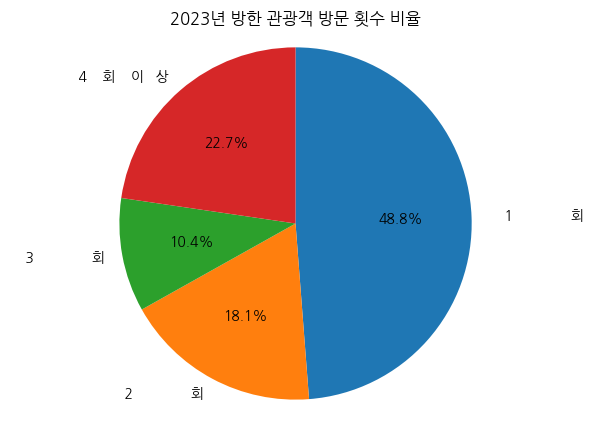

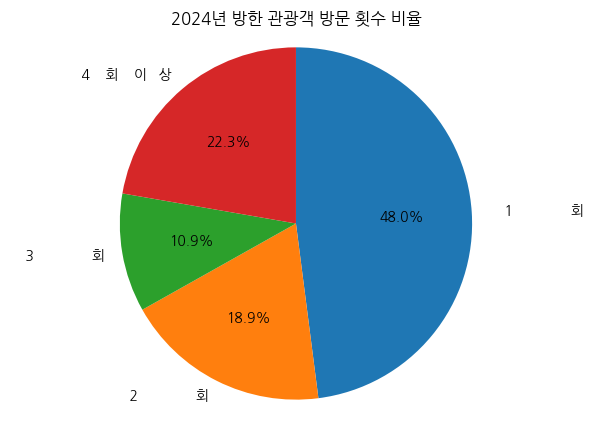

In [ ]:
def plot_true_visit_distribution(df, year):
    visit_counts = df['D_NUM'].value_counts().sort_index()
    labels_map = {
        1: "1회",
        2: "2회",
        3: "3회",
        4: "4회 이상"
    }
    labels = [labels_map.get(i, f"{i}") for i in visit_counts.index]

    plt.figure(figsize=(5, 5))
    plt.pie(visit_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f"{year}년 방한 관광객 방문 횟수 비율")
    plt.axis('equal')
    plt.show()

# 실행 예시
plot_true_visit_distribution(d2023, 2023)
plot_true_visit_distribution(d2024, 2024)


## 체크1- 재방문의 목적
재방문 횟수가 4회 이상인 방문객들은 업무목적등 정기적으로 한국을 방문해야하는 이유가 있을 것이다.

In [ ]:
import matplotlib.pyplot as plt

def plot_visit_purpose_by_count(df, year):
    # 비율 계산
    cross = df.groupby(['D_NUM', 'D_MOK']).size().unstack(fill_value=0)
    cross_percent = cross.div(cross.sum(axis=1), axis=0) * 100

    # 라벨 정의
    visit_labels = {1: '1회', 2: '2회', 3: '3회', 4: '4회 이상'}
    purpose_labels = {
        1: '여가/위락', 2: '친지 방문', 3: '비즈니스', 4: '교육', 5: '기타'
    }

    cross_percent.rename(index=visit_labels, columns=purpose_labels, inplace=True)

    # 시각화 준비
    fig, ax = plt.subplots(figsize=(9, 6))
    bottom = [0] * len(cross_percent)

    colors = plt.cm.tab20.colors
    for i, col in enumerate(cross_percent.columns):
        values = cross_percent[col].values
        bars = ax.bar(cross_percent.index, values, bottom=bottom, label=col, color=colors[i])
        for bar, value in zip(bars, values):
            if value > 3:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{value:.1f}%',
                    ha='center', va='center', fontsize=9, color='white'
                )
        bottom = [b + v for b, v in zip(bottom, values)]

    # 제목, 축
    ax.set_title(f'{year}년 방문횟수별 방한 목적 비율')
    ax.set_ylabel('비율 (%)')
    ax.set_xlabel('방문 횟수')

    # ✅ 범례 우측 상단으로 옮기기 + 폰트 작게
    ax.legend(
        title='방한 목적',
        bbox_to_anchor=(1.02, 1),  # 오른쪽 바깥에 배치
        loc='upper left',
        borderaxespad=0,
        fontsize=9,                # 범례 글자 크기
        title_fontsize=10         # 범례 제목 크기
    )

    plt.tight_layout()
    plt.show()

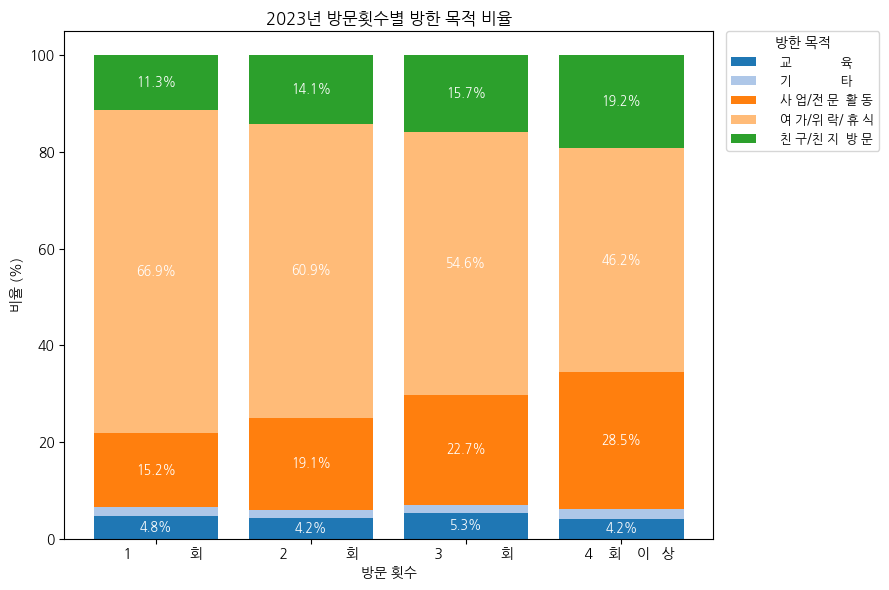

In [ ]:
plot_visit_purpose_by_count(d2023, 2023)

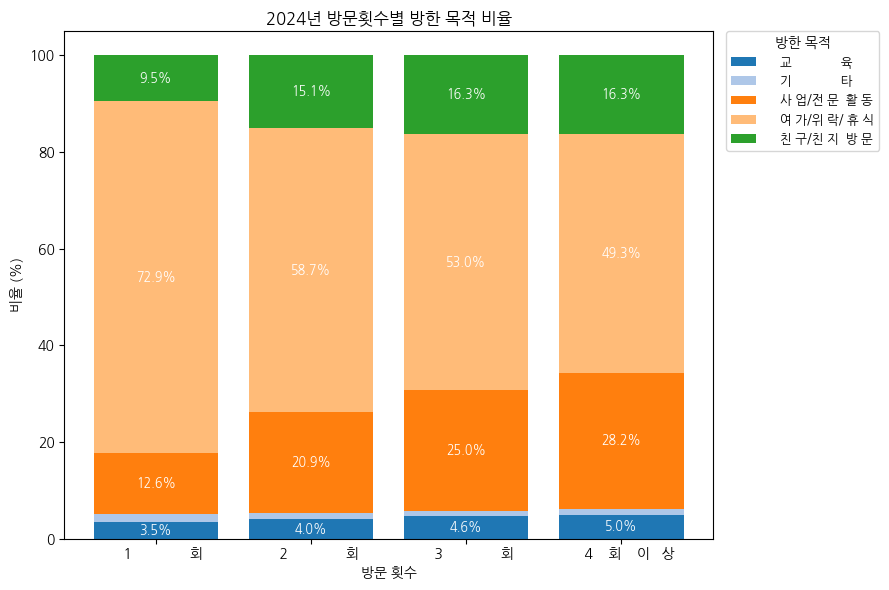

In [ ]:
plot_visit_purpose_by_count(d2024, 2024)

✅2024년 기준, 4회 이상 방문자 중 약 50%가 '여가/위락/휴식' 목적

✅2023년 대비, 약 3%p 상승

    ➡️좋은 신호!

## 체크2 - 특성 파악하기
✔️ 방문 지역

✔️ 참여한 활동

✔️ 만족한 활동 (참여한 활동과 만족한 활동의 내용이 다르다면 그 이유를 좀 더 살펴봐야할 듯 함)

✔️ 나이대와 국적



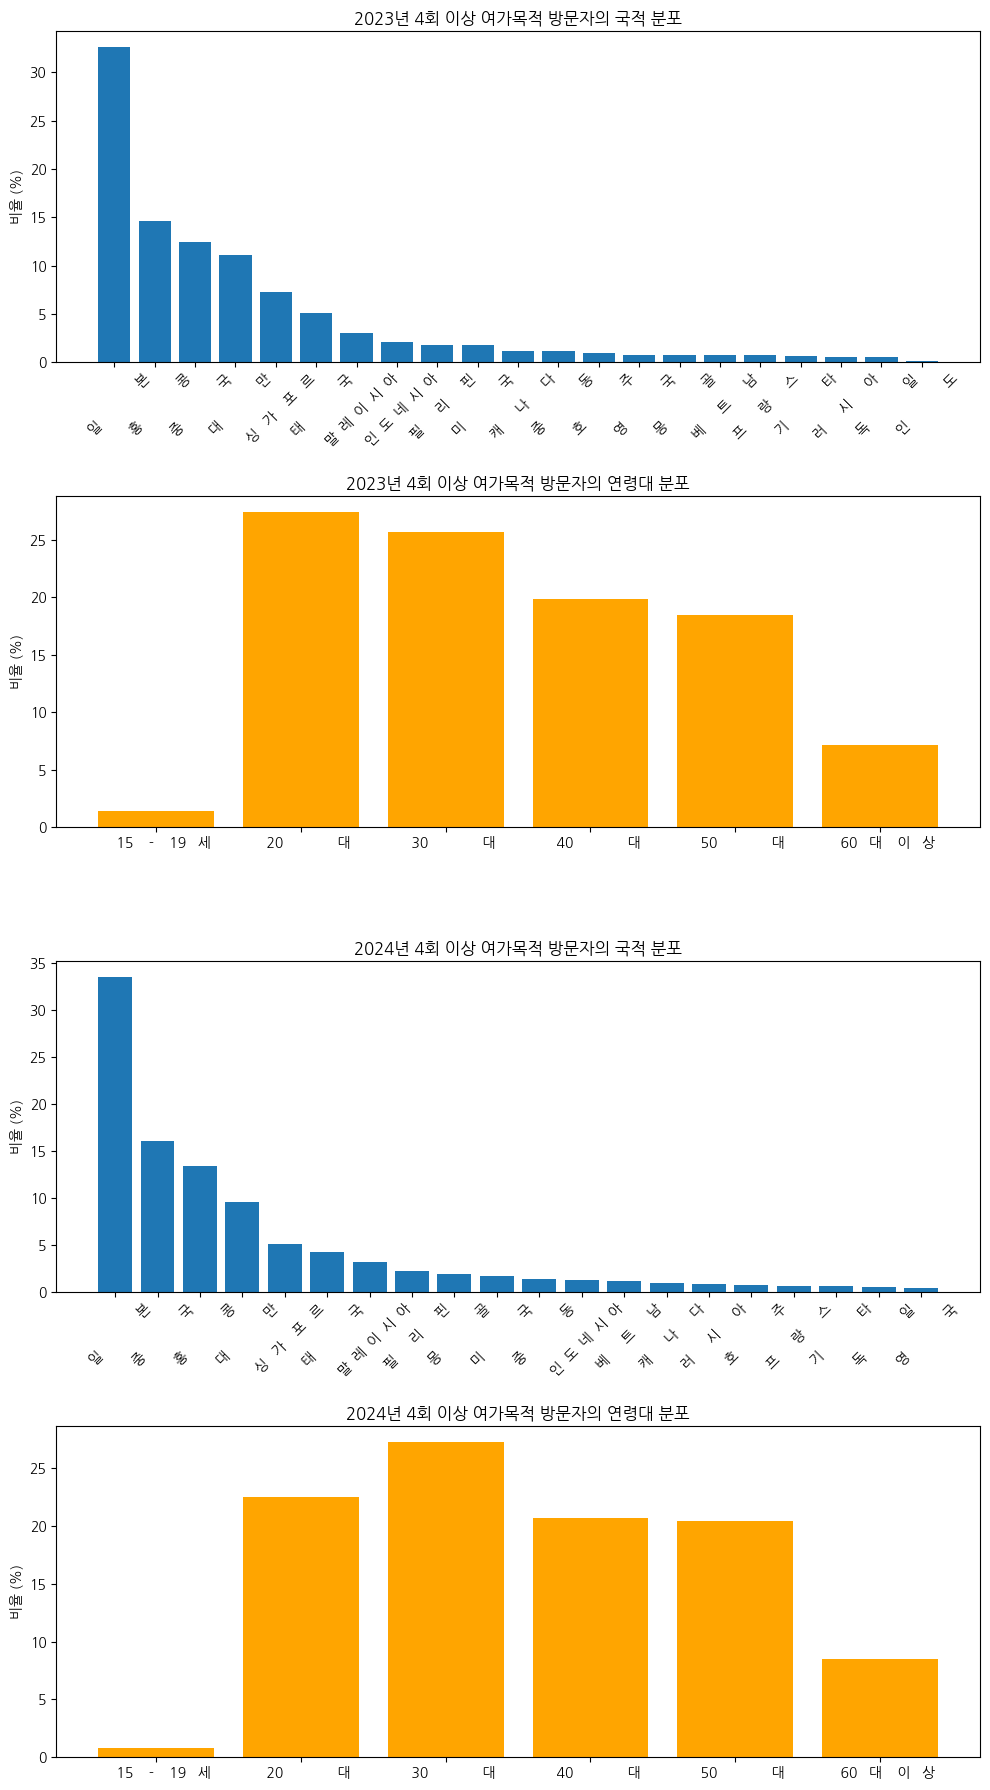

In [ ]:
import matplotlib.pyplot as plt

# 조건 필터링 (공백 포함 값 그대로 사용)
filtered_2023 = d2023[
    (d2023['D_NUM'].str.strip() == '4    회    이   상') &
    (d2023['D_MOK'].str.strip() == '여 가/위 락/ 휴 식')
]
filtered_2024 = d2024[
    (d2024['D_NUM'].str.strip() == '4    회    이   상') &
    (d2024['D_MOK'].str.strip() == '여 가/위 락/ 휴 식')
]

# 분포 계산 (%)
nat_2023 = filtered_2023['D_NAT'].value_counts(normalize=True).sort_values(ascending=False) * 100
age_2023 = filtered_2023['D_AGE'].value_counts(normalize=True).sort_index() * 100
nat_2024 = filtered_2024['D_NAT'].value_counts(normalize=True).sort_values(ascending=False) * 100
age_2024 = filtered_2024['D_AGE'].value_counts(normalize=True).sort_index() * 100

# 1열 4행 그래프
fig, axs = plt.subplots(4, 1, figsize=(10, 18))  # 세로로 길게

# 1. 2023 국적
axs[0].bar(nat_2023.index.astype(str), nat_2023.values)
axs[0].set_title("2023년 4회 이상 여가목적 방문자의 국적 분포")
axs[0].set_ylabel("비율 (%)")
axs[0].tick_params(axis='x', rotation=45)

# 2. 2023 연령
axs[1].bar(age_2023.index.astype(str), age_2023.values, color='orange')
axs[1].set_title("2023년 4회 이상 여가목적 방문자의 연령대 분포")
axs[1].set_ylabel("비율 (%)")

# 3. 2024 국적
axs[2].bar(nat_2024.index.astype(str), nat_2024.values)
axs[2].set_title("2024년 4회 이상 여가목적 방문자의 국적 분포")
axs[2].set_ylabel("비율 (%)")
axs[2].tick_params(axis='x', rotation=45)

# 4. 2024 연령
axs[3].bar(age_2024.index.astype(str), age_2024.values, color='orange')
axs[3].set_title("2024년 4회 이상 여가목적 방문자의 연령대 분포")
axs[3].set_ylabel("비율 (%)")

plt.tight_layout()
plt.show()


In [ ]:
d2023['D_MOK'].str.strip().unique()

array(['여 가/위 락/ 휴 식', '친 구/친 지  방 문', '기              타', '사 업/전 문  활 동',
       '교              육'], dtype=object)

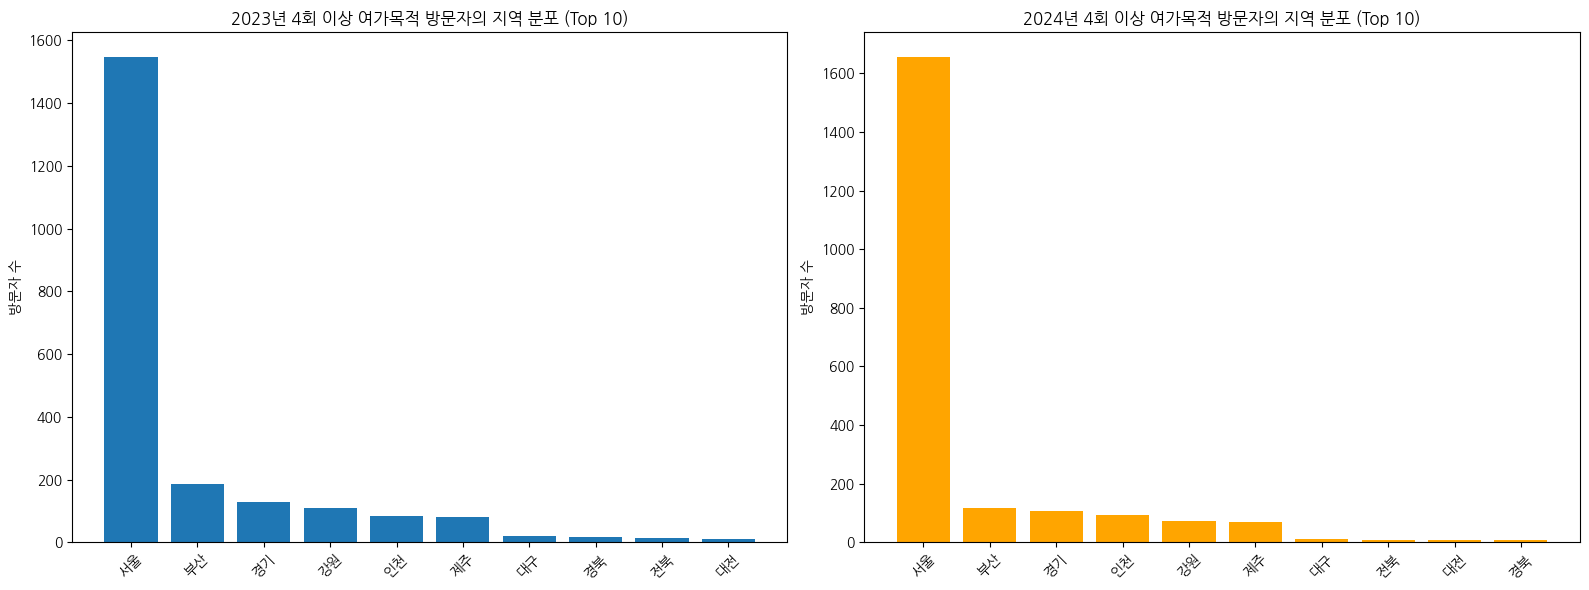

In [ ]:
import matplotlib.pyplot as plt

# 1. 지역 변수 컬럼 정의
region_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]

# 2. 조건 필터링
f2023 = d2023[
    (d2023['D_NUM'].str.strip() == '4    회    이   상') &
    (d2023['D_MOK'].str.strip() == '여 가/위 락/ 휴 식')
]
f2024 = d2024[
    (d2024['D_NUM'].str.strip() == '4    회    이   상') &
    (d2024['D_MOK'].str.strip() == '여 가/위 락/ 휴 식')
]

# 3. 지역별 방문 수 = NaN이 아닌 셀 수
region_2023 = f2023[region_cols].notna().sum().sort_values(ascending=False)
region_2024 = f2024[region_cols].notna().sum().sort_values(ascending=False)

# 4. 지역 코드 → 지역명 매핑
region_map = {
    1: '서울', 2: '경기', 3: '인천', 4: '강원', 5: '대전', 6: '충북',
    7: '충남', 8: '세종', 9: '경북', 10: '경남', 11: '대구', 12: '울산',
    13: '부산', 14: '광주', 15: '전북', 16: '전남', 17: '제주'
}
region_2023.index = [region_map[int(col[-2:])] for col in region_2023.index]
region_2024.index = [region_map[int(col[-2:])] for col in region_2024.index]

# 5. 시각화
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].bar(region_2023.index[:10], region_2023.values[:10])
axs[0].set_title("2023년 4회 이상 여가목적 방문자의 지역 분포 (Top 10)")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel("방문자 수")

axs[1].bar(region_2024.index[:10], region_2024.values[:10], color='orange')
axs[1].set_title("2024년 4회 이상 여가목적 방문자의 지역 분포 (Top 10)")
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylabel("방문자 수")

plt.tight_layout()
plt.show()


In [ ]:
d2023['Q9_2a14'][d2023['Q9_2a14'].notna() == True]

,Q9_2a14
128,광주
430,광주
460,광주
551,광주
573,광주
...,...
15462,광주
15488,광주
15489,광주
15615,광주


# 타겟 설정하기

## 문제점
우리나라 관광 산업은 특정 국가에 편중된 수요 구조를 갖고 있음(중국,일본, 대만, 홍콩 등의 아시아국가가 매년 방한하는 관광객들의 국적top5를 기록하고 있음)

➡️이런 경우, 외교나 경제 상황이 달라지는 경우 크게 흔들릴 수 있어서 다변화가 필요하다는 판단

✔️ 성장시장(동남아,중동)과 신흥시장(미주,유럽), 그리고 성숙시장(아시아권)을 구별해서 파악진행

In [ ]:
df2024=pd.read_csv("/content/drive/MyDrive/관광공모전/원본데이터/2024 외래관광객조사_Data_csv.csv")

In [ ]:
df2023=pd.read_csv("/content/drive/MyDrive/관광공모전/원본데이터/2023 외래관광객조사 DATA_csv.csv",low_memory=False)

In [ ]:
df2023.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


In [ ]:
df2024.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4,5.0,1,1,7.0,NaN,NaN,NaN,...,2,5,1,4,1,198.02,NaN,NaN,NaN,198.02
1,58,4,4,5.0,1,1,7.0,10.0,2.0,1.0,...,2,4,1,4,1,784.28,NaN,NaN,NaN,784.28
2,59,3,3,5.0,1,1,7.0,2.0,8.0,1.0,...,2,3,1,3,1,607.02,NaN,NaN,NaN,607.02
3,60,1,1,NaN,1,1,8.0,7.0,3.0,NaN,...,1,2,1,1,1,1049.50,NaN,NaN,NaN,1049.50
4,61,5,4,5.0,1,1,2.0,9.0,10.0,4.0,...,2,2,1,4,1,876.80,NaN,NaN,NaN,876.80


In [ ]:
df2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16216 entries, 0 to 16215
Columns: 402 entries, pnid to weight
dtypes: float64(348), int64(54)
memory usage: 49.7 MB


In [ ]:
def categorize_market_by_code(code):
    if code in [6, 7, 8, 9, 10, 11, 12, 13, 20]:  # 동남아 + 인도 + 중동
        return '성장시장(동남아/중동)'
    elif code in [4, 14, 15, 16, 18, 19]:  # 미국, 캐나다, 호주, 영국, 독일, 프랑스
        return '신흥시장(미주/유럽)'
    else:
        return '성숙시장(일본/중화권)'

df2023['market'] = df2023['D_NAT'].apply(categorize_market_by_code)
df2024['market'] = df2024['D_NAT'].apply(categorize_market_by_code)

In [ ]:
print(df2023['market'].value_counts())
print(df2024['market'].value_counts())

market
성숙시장(일본/중화권)    6723
성장시장(동남아/중동)    5372
신흥시장(미주/유럽)     4101
Name: count, dtype: int64
market
성숙시장(일본/중화권)    7382
성장시장(동남아/중동)    5283
신흥시장(미주/유럽)     3551
Name: count, dtype: int64


In [ ]:
# 방한 목적과 관련된 컬럼이 2가지라서, 2개의 차이를 살펴보고자 함
print(df2024['Q1'].value_counts(dropna=False).sort_index())
print(df2024['D_MOK'].value_counts(dropna=False).sort_index())

Q1
1    10183
2     2078
3     3084
4      659
5      212
Name: count, dtype: int64
D_MOK
1    10183
2     2078
3     3084
4      659
5      212
Name: count, dtype: int64


In [ ]:
# 모두 같음을 확인 -> D_MOK을 주로 활용
(df2024['Q1'] == df2024['D_MOK']).value_counts()

,count
True,16216


## 성장시장 VS 신흥시장 방한 목적 비교(2024)

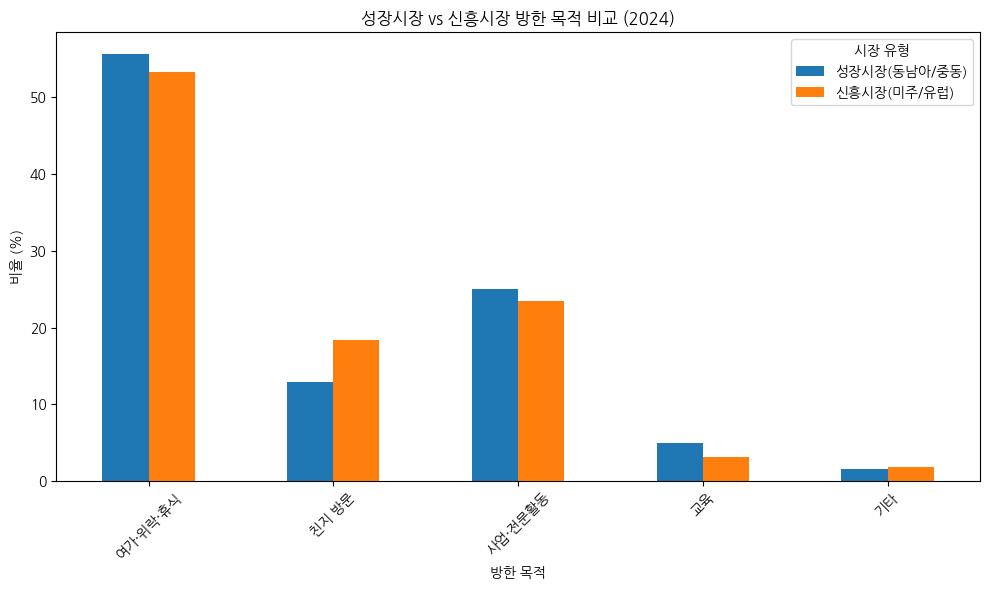

In [ ]:
import matplotlib.pyplot as plt

# 라벨 딕셔너리
purpose_label = {
    1: '여가·위락·휴식',
    2: '친지 방문',
    3: '사업·전문활동',
    4: '교육',
    5: '기타'
}

# 성장/신흥시장만 필터
df_filtered = df2024[df2024['market'].isin(['성장시장(동남아/중동)', '신흥시장(미주/유럽)'])]

# 집계
purpose_counts = df_filtered.groupby(['market', 'D_MOK']).size().reset_index(name='count')
purpose_counts['비율'] = purpose_counts.groupby('market')['count'].transform(lambda x: x / x.sum() * 100)

# D_MOK 숫자를 목적명으로 변환 (여기서 index로 사용)
purpose_counts['목적'] = purpose_counts['D_MOK'].map(purpose_label)

# 피벗테이블 생성
pivot_df = purpose_counts.pivot(index='목적', columns='market', values='비율').fillna(0)

# 시각화
pivot_df = pivot_df.loc[list(purpose_label.values())]  # 인덱스 순서 정리
pivot_df.plot(kind='bar', figsize=(10, 6))

plt.title("성장시장 vs 신흥시장 방한 목적 비교 (2024)")
plt.ylabel("비율 (%)")
plt.xlabel("방한 목적")
plt.xticks(rotation=45)
plt.legend(title='시장 유형')
plt.tight_layout()
plt.show()


In [ ]:
df2024['D_MOK'].unique()

array([1, 2, 3, 4, 5])

## 연령대 분포 비교

In [ ]:
df_target = df2024[
    df2024['market'].isin(['성장시장(동남아/중동)', '신흥시장(미주/유럽)'])
].copy()

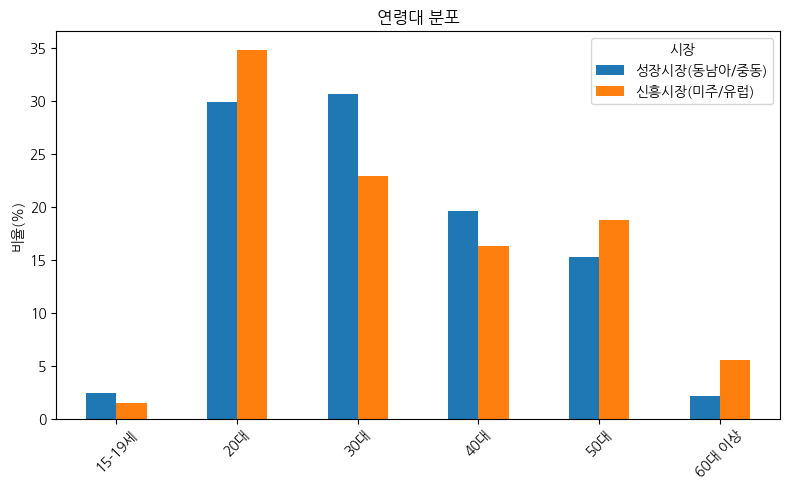

In [ ]:
# 연령대 분포 비교: D_AGE (1:15~19세, 2:20대, ..., 6:60대 이상)
def plot_categorical_distribution(df, column, labels=None, title=None):
    temp = df[['market', column]].dropna()
    ct = temp.groupby(['market', column]).size().reset_index(name='count')
    ct['ratio'] = ct.groupby('market')['count'].transform(lambda x: x / x.sum() * 100)

    if labels:
        ct[column] = ct[column].map(labels)

    pivot = ct.pivot(index=column, columns='market', values='ratio').fillna(0)
    pivot.plot(kind='bar', figsize=(8, 5))
    plt.title(title or column)
    plt.ylabel("비율(%)")
    plt.xlabel("")
    plt.xticks(rotation=45)
    plt.legend(title='시장')
    plt.tight_layout()
    plt.show()

# 실행
plot_categorical_distribution(
    df_target, 'D_AGE',
    labels={1: '15-19세', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대 이상'},
    title='연령대 분포'
)


## 방문횟수

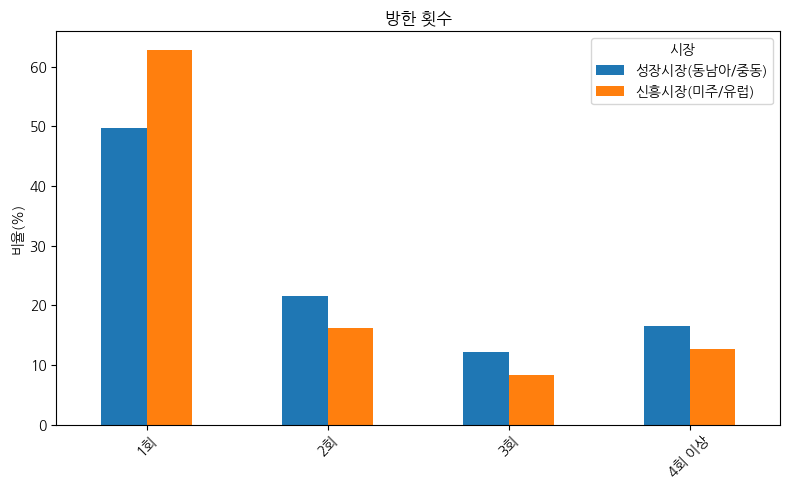

In [ ]:
plot_categorical_distribution(
    df_target, 'D_NUM',
    labels={1: '1회', 2: '2회', 3: '3회', 4: '4회 이상'},
    title='방한 횟수'
)

## 체류일수

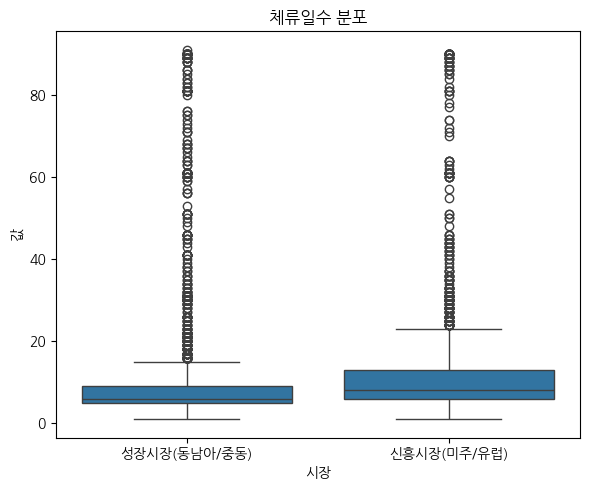

In [ ]:
def plot_boxplot(df, column, title=None):
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df, x='market', y=column)
    plt.title(title or column)
    plt.ylabel("값")
    plt.xlabel("시장")
    plt.tight_layout()
    plt.show()

plot_boxplot(df_target, 'M일HAP', title='체류일수 분포')

## 지출경비

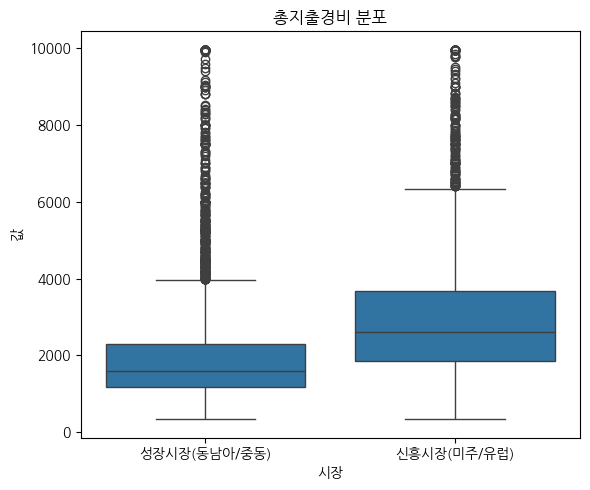

In [ ]:
plot_boxplot(df_target, '총액1인TOT2', title='총지출경비 분포')

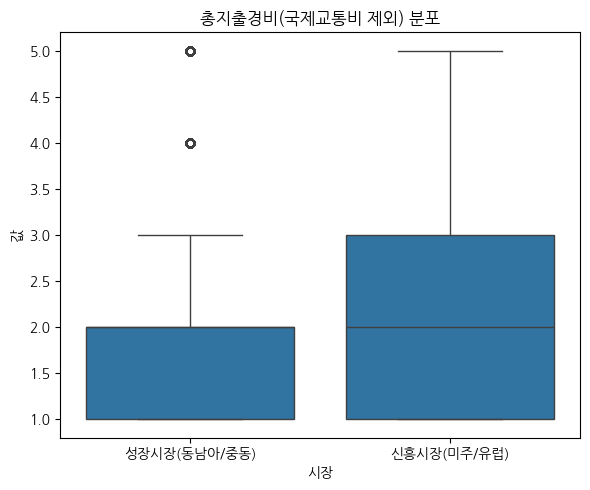

In [ ]:
plot_boxplot(df_target, 'C총액1인TOT_개별국제교통비제외2', title='총지출경비(국제교통비 제외) 분포')

## 방문지역

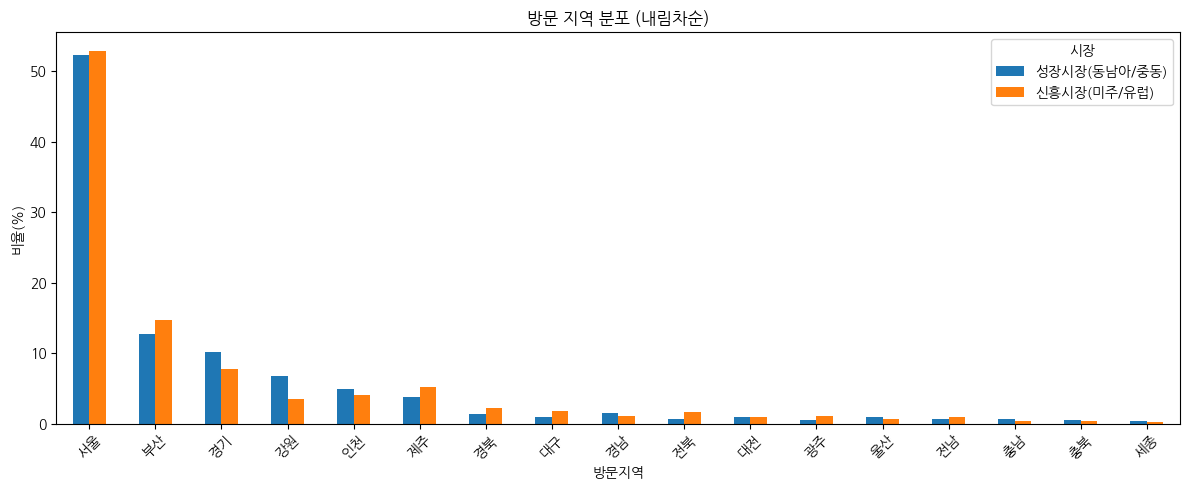

In [ ]:
region_cols = {
    'Q9_2a01': '서울', 'Q9_2a02': '경기', 'Q9_2a03': '인천', 'Q9_2a04': '강원',
    'Q9_2a05': '대전', 'Q9_2a06': '충북', 'Q9_2a07': '충남', 'Q9_2a08': '세종',
    'Q9_2a09': '경북', 'Q9_2a10': '경남', 'Q9_2a11': '대구', 'Q9_2a12': '울산',
    'Q9_2a13': '부산', 'Q9_2a14': '광주', 'Q9_2a15': '전북', 'Q9_2a16': '전남',
    'Q9_2a17': '제주'
}

df_region = df_target[['market'] + list(region_cols.keys())].melt(
    id_vars='market', var_name='방문지역', value_name='응답값'
)
df_region = df_region[df_region['응답값'].notnull()]

region_ct = df_region.groupby(['market', '방문지역']).size().reset_index(name='count')
region_ct['ratio'] = region_ct.groupby('market')['count'].transform(lambda x: x / x.sum() * 100)
region_ct['방문지역'] = region_ct['방문지역'].map(region_cols)

pivot = region_ct.pivot(index='방문지역', columns='market', values='ratio').fillna(0)

# ✅ 내림차순 정렬
pivot['합계'] = pivot.sum(axis=1)
pivot = pivot.sort_values(by='합계', ascending=False).drop(columns='합계')

pivot.plot(kind='bar', figsize=(12, 5))
plt.title('방문 지역 분포 (내림차순)')
plt.ylabel("비율(%)")
plt.xticks(rotation=45)
plt.legend(title='시장')
plt.tight_layout()
plt.show()

## 만족도/의향

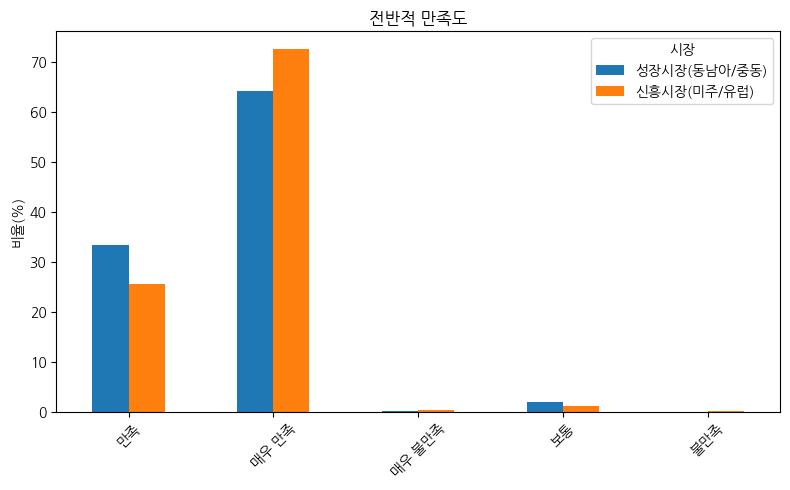

In [ ]:
## 전반적 만족도(Q11)
plot_categorical_distribution(
    df_target, 'Q11',
    labels={1: '매우 불만족', 2: '불만족', 3: '보통', 4: '만족', 5: '매우 만족'},
    title='전반적 만족도'
)

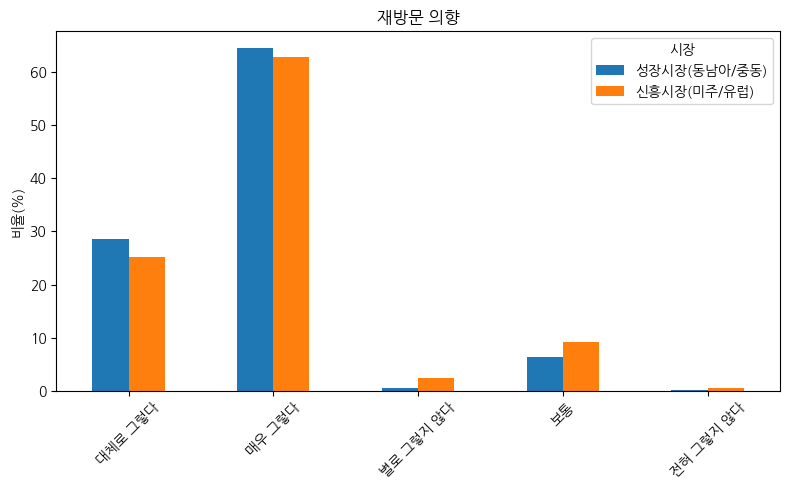

In [ ]:
## 재방문의향(Q13)
plot_categorical_distribution(
    df_target, 'Q13',
    labels={1: '전혀 그렇지 않다', 2: '별로 그렇지 않다', 3: '보통', 4: '대체로 그렇다', 5: '매우 그렇다'},
    title='재방문 의향'
)

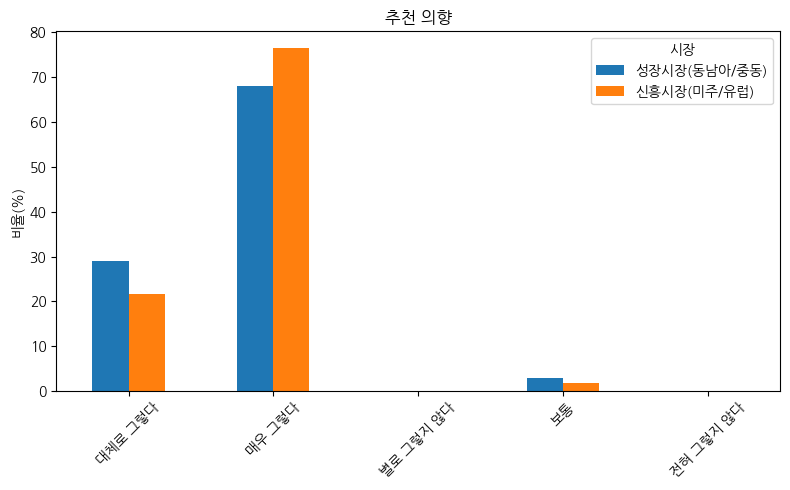

In [ ]:
## 추천 의향(Q14)
plot_categorical_distribution(
    df_target, 'Q14',
    labels={1: '전혀 그렇지 않다', 2: '별로 그렇지 않다', 3: '보통', 4: '대체로 그렇다', 5: '매우 그렇다'},
    title='추천 의향'
)


🌟 현 시점에서는 신흥시장의 관광객은 성장시장에 비해 재방문율은 낮지만, 1회 방문 시 체류기간이 길고 국내 소비가 훨씬 활발하다.

🌟 이는 단 한번의 유치로도 높은 경제적 파급 효과를 기대할 수 있음을 의미함!! 따라서, 향후 신흥시장 대상 유치 전략을 강화할 경우, 관광시장의 지속 가능하고 안정적인 성장 기반을 확보하는데에 중요한 역할을 할 것으로 보인다.

## 재방문의향 보통을 선택한 사람들의 특성(신흥시장만)

In [ ]:
## 데이터 필터링
# 1. 신흥시장이면서 재방문 의향이 '보통'(3)인 사람만 추출
df_revisit_mid = df_target[
    (df_target['market'] == '신흥시장(미주/유럽)') & (df_target['Q13'] == 3)
]

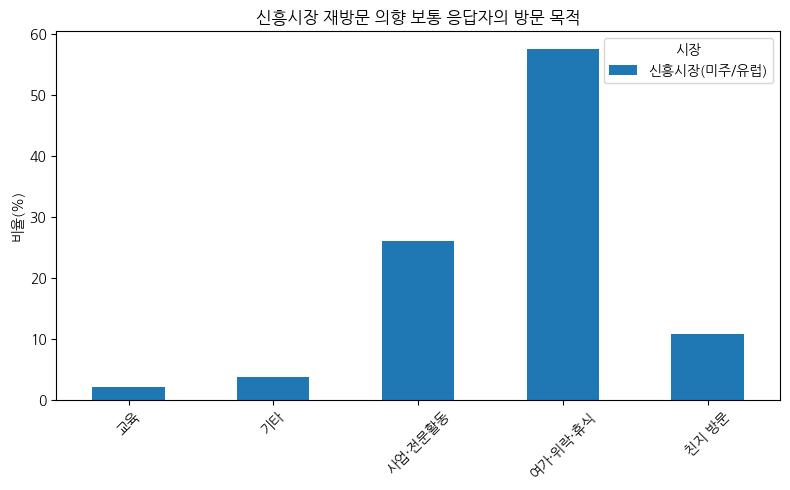

In [ ]:
## 방문목적
plot_categorical_distribution(
    df_revisit_mid, 'D_MOK',
    labels={1: '여가·위락·휴식', 2: '친지 방문', 3: '사업·전문활동', 4: '교육', 5: '기타'},
    title='신흥시장 재방문 의향 보통 응답자의 방문 목적'
)


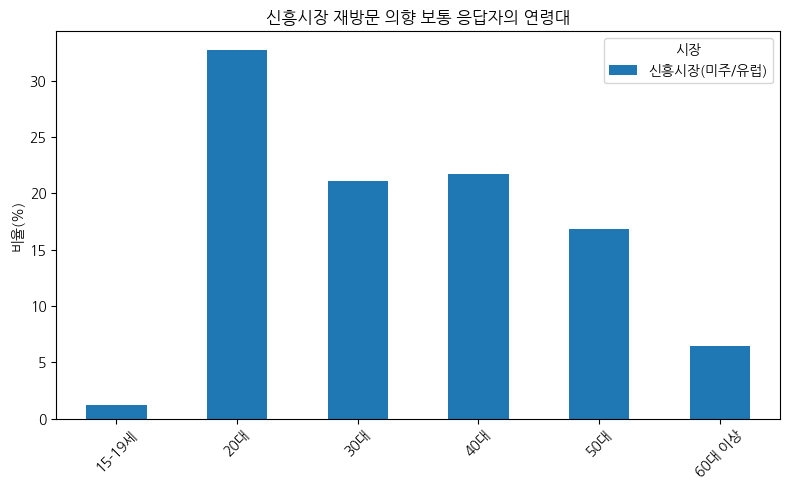

In [ ]:
## 연령대
plot_categorical_distribution(
    df_revisit_mid, 'D_AGE',
    labels={1: '15-19세', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대 이상'},
    title='신흥시장 재방문 의향 보통 응답자의 연령대'
)

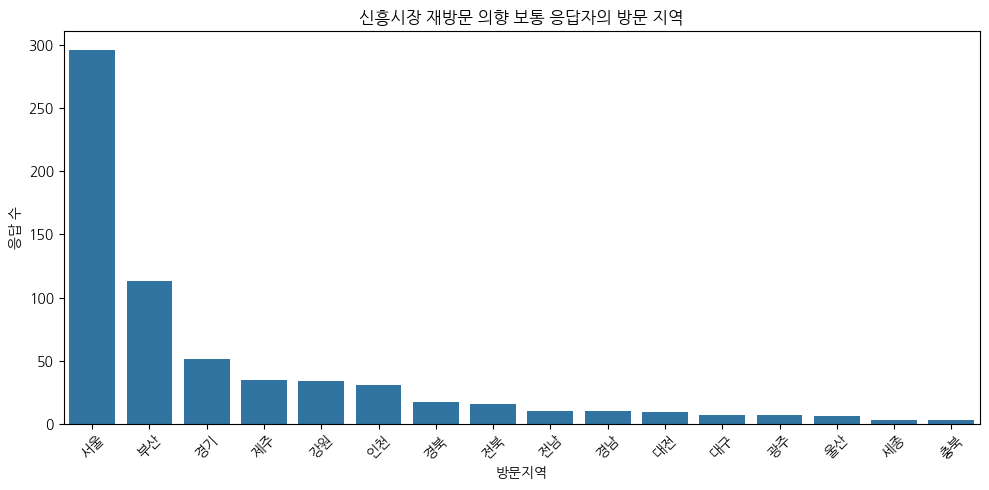

In [ ]:
## 방문지역
region_cols = {
    'Q9_2a01': '서울', 'Q9_2a02': '경기', 'Q9_2a03': '인천', 'Q9_2a04': '강원',
    'Q9_2a05': '대전', 'Q9_2a06': '충북', 'Q9_2a07': '충남', 'Q9_2a08': '세종',
    'Q9_2a09': '경북', 'Q9_2a10': '경남', 'Q9_2a11': '대구', 'Q9_2a12': '울산',
    'Q9_2a13': '부산', 'Q9_2a14': '광주', 'Q9_2a15': '전북', 'Q9_2a16': '전남',
    'Q9_2a17': '제주'
}

df_region = df_revisit_mid[['market'] + list(region_cols.keys())].melt(
    id_vars='market', var_name='방문지역', value_name='응답값'
)
df_region = df_region[df_region['응답값'].notnull()]
region_ct = df_region.groupby('방문지역').size().reset_index(name='count')
region_ct['방문지역'] = region_ct['방문지역'].map(region_cols)
region_ct = region_ct.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=region_ct, x='방문지역', y='count')
plt.title('신흥시장 재방문 의향 보통 응답자의 방문 지역')
plt.ylabel('응답 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


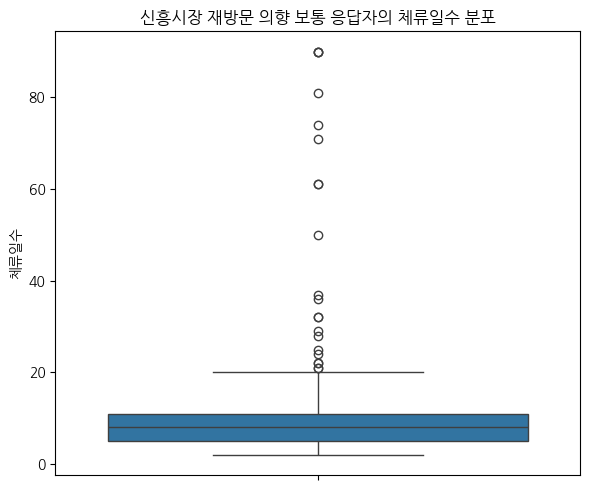

In [ ]:
## 체류일수
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_revisit_mid, y='M일HAP')
plt.title('신흥시장 재방문 의향 보통 응답자의 체류일수 분포')
plt.ylabel('체류일수')
plt.tight_layout()
plt.show()

## 0704분석내용

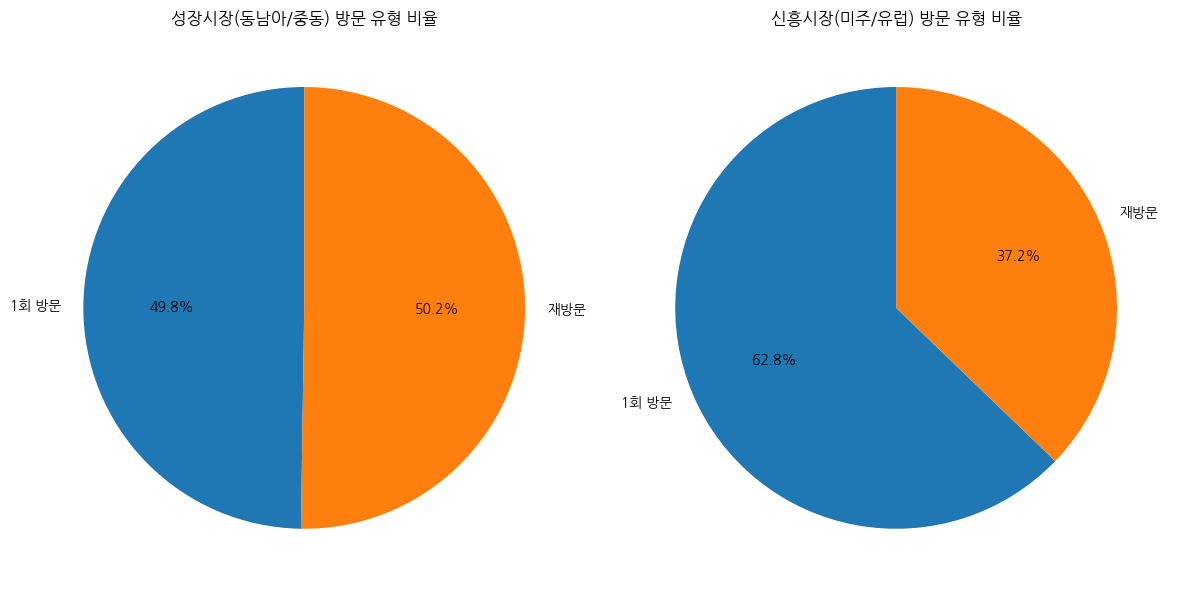

In [ ]:
# 2. market 및 visit_type 정의
df2024['market'] = df2024['D_NAT'].apply(categorize_market_by_code)
df2024['visit_type'] = df2024['RVIT'].apply(lambda x: '1회 방문' if x == 1 else '재방문')

# 3. 대상 필터링
target_markets = ['성장시장(동남아/중동)', '신흥시장(미주/유럽)']
df_filtered = df2024[df2024['market'].isin(target_markets)]

# 4. 시장별 방문유형 집계
visit_counts = (
    df_filtered.groupby(['market', 'visit_type'])
    .size()
    .reset_index(name='count')
)

# 5. 파이차트 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, market in enumerate(target_markets):
    market_data = visit_counts[visit_counts['market'] == market]
    axes[i].pie(
        market_data['count'],
        labels=market_data['visit_type'],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(f'{market} 방문 유형 비율')

plt.tight_layout()
plt.show()

In [ ]:
print(df2024['RVIT'].unique())


[4 3 1 2]


신흥시장만 필터링

In [ ]:
# 4. 신흥시장만 필터링
df_sh = df2024[df2024['market'] == '신흥시장(미주/유럽)'].copy()
df_sj = df2024[df2024['market'] == '성장시장(동남아/중동)'].copy()
# 5. visit_type 분포 확인 (문제 없는지 체크)
print("신흥시장", df_sh['visit_type'].value_counts())
print("-"*8)
print("성장시장", df_sj['visit_type'].value_counts())

신흥시장 visit_type
1회 방문    2230
재방문      1321
Name: count, dtype: int64
--------
성장시장 visit_type
재방문      2654
1회 방문    2629
Name: count, dtype: int64


In [ ]:
import pandas as pd
import scipy.stats as stats

visit_crosstab = pd.crosstab(df2024['market'], df2024['visit_type'])

# 3. 신흥 vs 성장시장만 비교용 테이블 추출
chi_table = visit_crosstab.loc[['성장시장(동남아/중동)', '신흥시장(미주/유럽)']]

# 4. 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(chi_table)

# 5. 기대빈도표
expected_df = pd.DataFrame(expected, index=chi_table.index, columns=chi_table.columns)

# 6. 결과 출력
print("카이제곱 통계량:", round(chi2, 3))
print("p값:", round(p, 5))
print("자유도:", dof)
print("통계적 유의성 (α=0.05):", "유의함" if p < 0.05 else "유의하지 않음")
print("\n[기대빈도표]")
print(expected_df)

카이제곱 통계량: 145.282
p값: 0.0
자유도: 1
통계적 유의성 (α=0.05): 유의함

[기대빈도표]
visit_type          1회 방문          재방문
market                                
성장시장(동남아/중동)  2905.829409  2377.170591
신흥시장(미주/유럽)   1953.170591  1597.829409


신흥시장(미주/유럽) 관광객은 재방문율이 기대보다 유의미하게 낮음

반대로 성장시장(동남아/중동) 관광객은 재방문율이 기대보다 높음

➡️ 따라서 신흥시장에 대해 재방문 유도 정책이 필요하다는 통계적 근거



In [ ]:
df_sh['TYP'].unique()

array([1, 3, 2])

In [ ]:
# 여행 형태 비율 비교
df_sh.groupby('visit_type')['TYP'].value_counts(normalize=True).unstack().round(3)


TYP,1,2,3
visit_type,,,
1회 방문,0.954,0.006,0.040
재방문,0.979,0.005,0.017


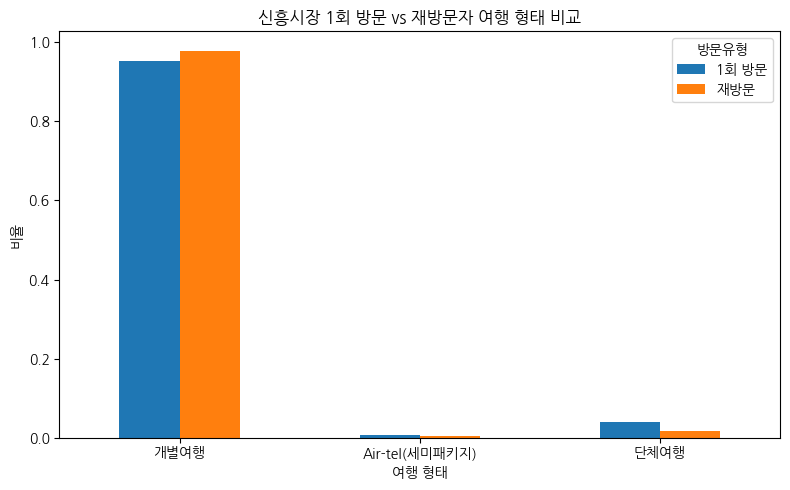

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 매핑 딕셔너리 (코드북 기준)
typ_map = {
    1: '개별여행',
    2: 'Air-tel(세미패키지)',
    3: '단체여행'
}

# 2. TYP 분포 비율 계산
typ_rate = df_sh.groupby('visit_type')['TYP'].value_counts(normalize=True).unstack().fillna(0)

# 3. 코드값 → 한글로 매핑
typ_rate.index.name = '방문유형'
typ_rate.columns = [typ_map.get(col, col) for col in typ_rate.columns]

# 4. 시각화
typ_rate.T.plot(kind='bar', figsize=(8,5))
plt.title("신흥시장 1회 방문 vs 재방문자 여행 형태 비교")
plt.ylabel("비율")
plt.xlabel("여행 형태")
plt.xticks(rotation=0)
plt.legend(title="방문유형")
plt.tight_layout()
plt.show()

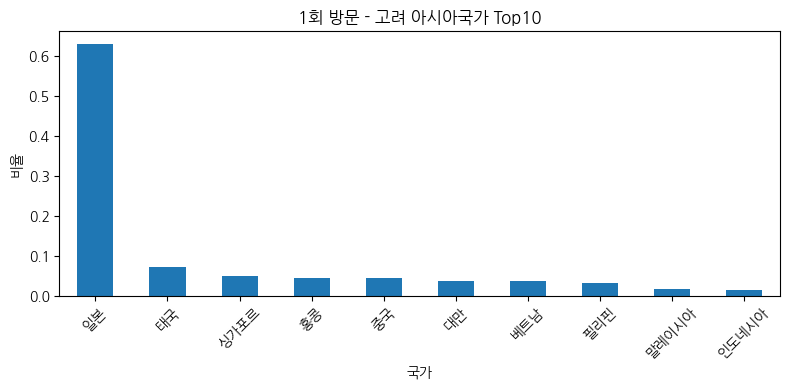

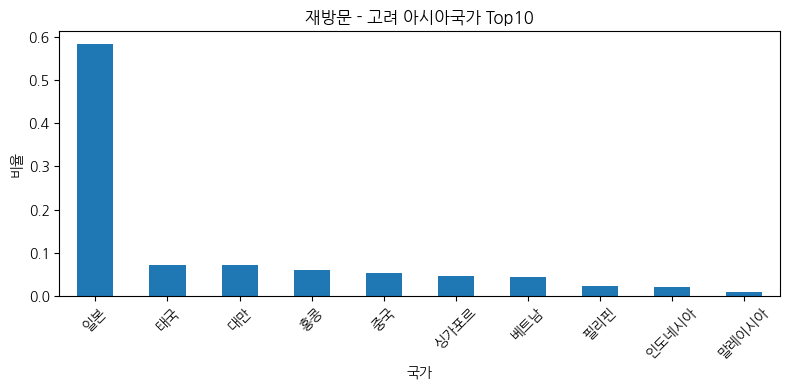

In [ ]:
# 방문 고려 아시아 국가 TopN
asia_map = {
    1: '일본', 2: '중국', 3: '대만', 4: '홍콩', 5: '싱가포르',
    6: '태국', 7: '말레이시아', 8: '마카오', 9: '인도', 10: '인도네시아',
    11: '필리핀', 12: '베트남', 13: '캄보디아', 14: '기타', 15: '없다'
}
df_sh['Q2a1_label'] = df_sh['Q2a1'].map(asia_map)

for group in ['1회 방문', '재방문']:
    df_sh[df_sh['visit_type'] == group]['Q2a1_label'].value_counts(normalize=True).head(10).plot(
        kind='bar', figsize=(8, 4), title=f'{group} - 고려 아시아국가 Top10'
    )
    plt.ylabel("비율")
    plt.xlabel("국가")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


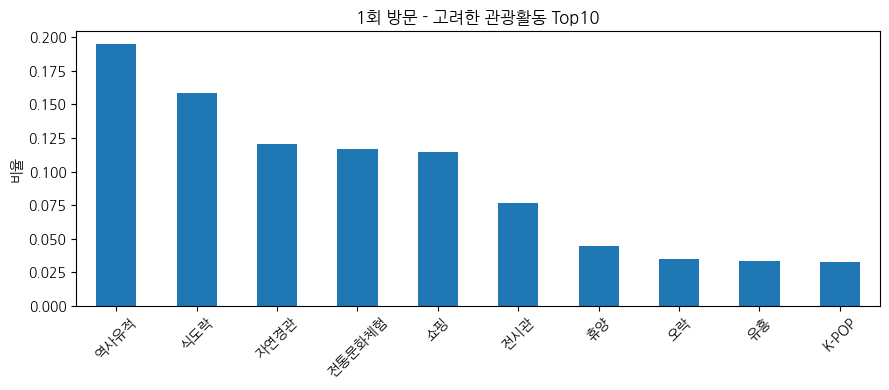

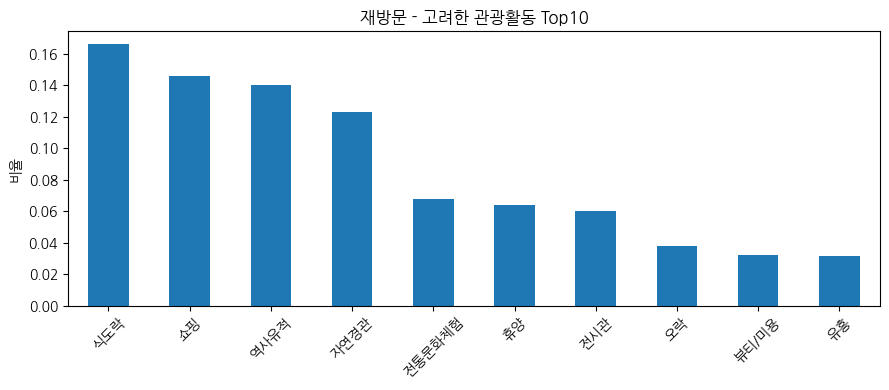

In [ ]:
# 고려한 관광활동
activity_map = {
    1: '식도락', 2: '쇼핑', 3: '자연경관', 4: '휴양', 5: '역사유적',
    6: '전통문화체험', 7: '전시관', 8: 'K-POP', 9: '공연관람', 10: '지역축제',
    11: '유흥', 12: '오락', 13: '뷰티/미용', 14: '치료', 15: '스포츠관람',
    16: '스포츠참여', 17: '기타'
}
q3_cols = ['Q3_1a1', 'Q3_1a2', 'Q3_1a3']
for group in ['1회 방문', '재방문']:
    temp = df_sh[df_sh['visit_type'] == group][q3_cols].stack().map(activity_map).value_counts(normalize=True).head(10)
    temp.plot(kind='bar', title=f'{group} - 고려한 관광활동 Top10', figsize=(9, 4))
    plt.ylabel("비율")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


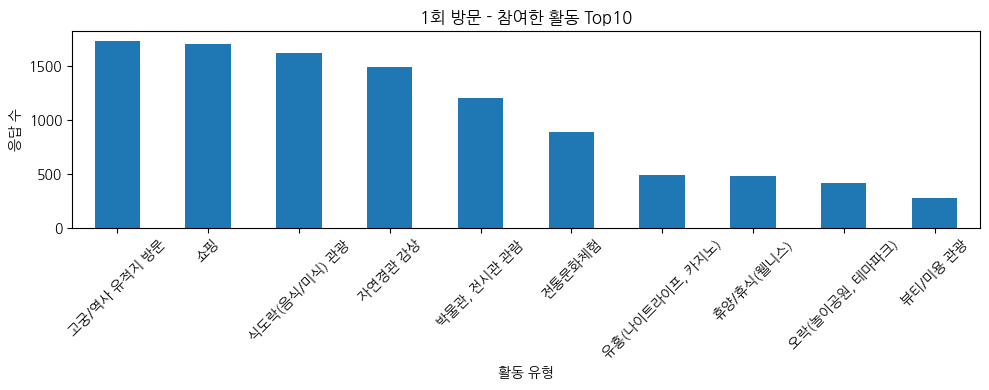

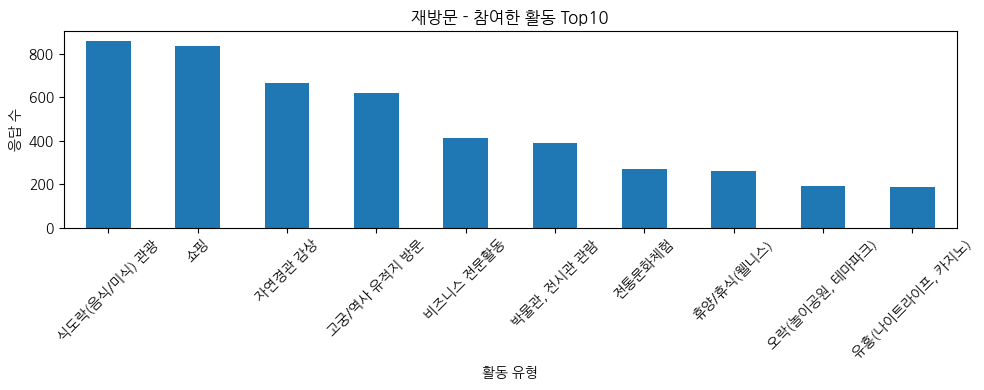

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Q8 활동 코드값 → 활동명 매핑
q8_activity_map = {
    1: '식도락(음식/미식) 관광',
    2: '쇼핑',
    3: '자연경관 감상',
    4: '휴양/휴식(웰니스)',
    5: '고궁/역사 유적지 방문',
    6: '전통문화체험',
    7: '박물관, 전시관 관람',
    8: 'K-POP/한류스타 공연/촬영지 방문',
    9: '연극, 뮤지컬, 발레 공연 관람',
    10: '지역 축제 참여',
    11: '유흥(나이트라이프, 카지노)',
    12: '오락(놀이공원, 테마파크)',
    13: '뷰티/미용 관광',
    14: '치료/건강검진',
    15: '스포츠/레포츠 관람',
    16: '스포츠/레포츠 참가',
    17: '국제회의',
    18: '비즈니스 전문활동',
    19: '연수, 교육, 연구',
    20: '기타'
}

# 2. 참여활동 컬럼 정의
q8_cols = [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]

# 3. visit_type별로 참여 활동 시각화
for group in ['1회 방문', '재방문']:
    subset = df_sh[df_sh['visit_type'] == group]
    # stack 후 코드값별 count
    counts = subset[q8_cols].stack().value_counts().head(10)
    # 한글 매핑
    counts.index = counts.index.map(q8_activity_map)
    # 시각화
    counts.plot(kind='bar', title=f'{group} - 참여한 활동 Top10', figsize=(10, 4))
    plt.ylabel("응답 수")
    plt.xlabel("활동 유형")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


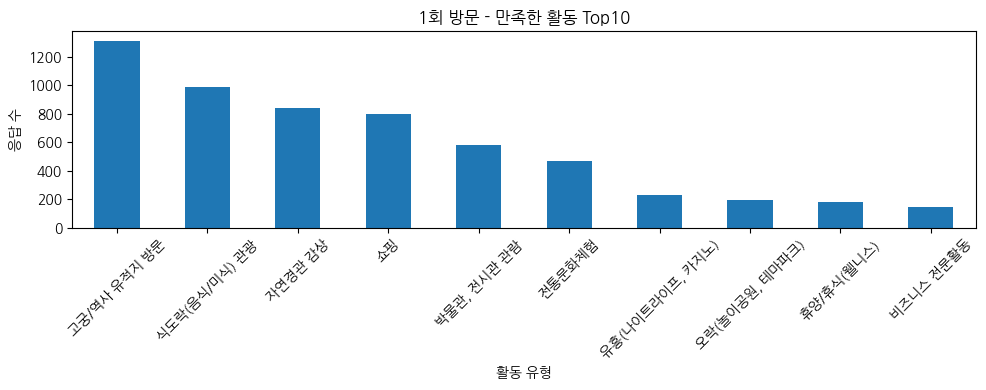

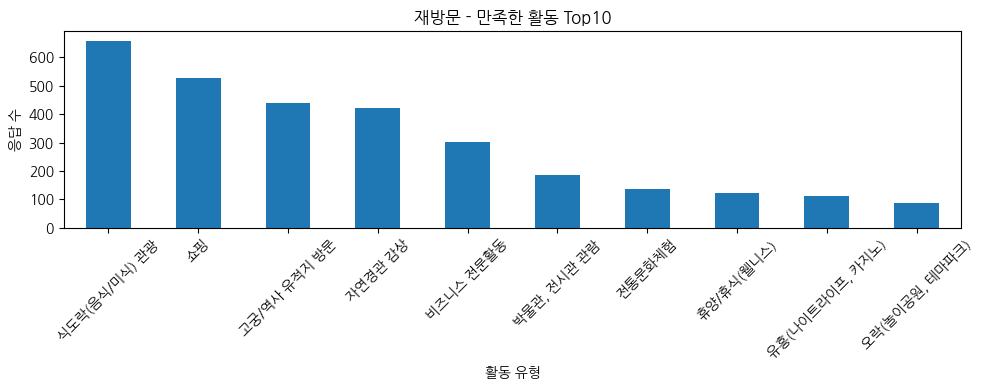

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 활동명 매핑 (Q8과 동일)
q8_activity_map = {
    1: '식도락(음식/미식) 관광',
    2: '쇼핑',
    3: '자연경관 감상',
    4: '휴양/휴식(웰니스)',
    5: '고궁/역사 유적지 방문',
    6: '전통문화체험',
    7: '박물관, 전시관 관람',
    8: 'K-POP/한류스타 공연/촬영지 방문',
    9: '연극, 뮤지컬, 발레 공연 관람',
    10: '지역 축제 참여',
    11: '유흥(나이트라이프, 카지노)',
    12: '오락(놀이공원, 테마파크)',
    13: '뷰티/미용 관광',
    14: '치료/건강검진',
    15: '스포츠/레포츠 관람',
    16: '스포츠/레포츠 참가',
    17: '국제회의',
    18: '비즈니스 전문활동',
    19: '연수, 교육, 연구',
    20: '기타'
}

# 2. 만족한 활동 컬럼 정의
q8s_cols = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3']

# 3. visit_type별 만족 활동 시각화
for group in ['1회 방문', '재방문']:
    subset = df_sh[df_sh['visit_type'] == group]
    counts = subset[q8s_cols].stack().value_counts().head(10)
    counts.index = counts.index.map(q8_activity_map)

    counts.plot(kind='bar', title=f'{group} - 만족한 활동 Top10', figsize=(10, 4))
    plt.ylabel("응답 수")
    plt.xlabel("활동 유형")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


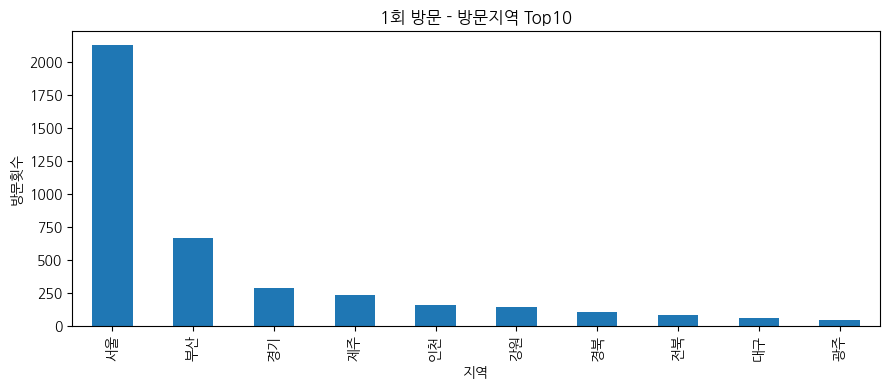

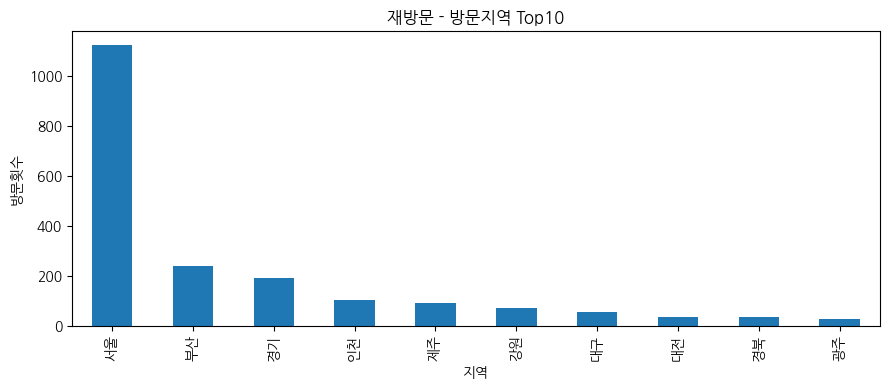

In [ ]:
q9_cols = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
region_map = {
    1: '서울', 2: '경기', 3: '인천', 4: '강원', 5: '대전', 6: '충북', 7: '충남',
    8: '세종', 9: '경북', 10: '경남', 11: '대구', 12: '울산', 13: '부산', 14: '광주',
    15: '전북', 16: '전남', 17: '제주'
}
for group in ['1회 방문', '재방문']:
    temp = df_sh[df_sh['visit_type'] == group][q9_cols].stack().value_counts().head(10)
    temp.index = temp.index.map(region_map)
    temp.plot(kind='bar', title=f'{group} - 방문지역 Top10', figsize=(9, 4))
    plt.ylabel("방문횟수")
    plt.xlabel("지역")
    plt.tight_layout()
    plt.show()


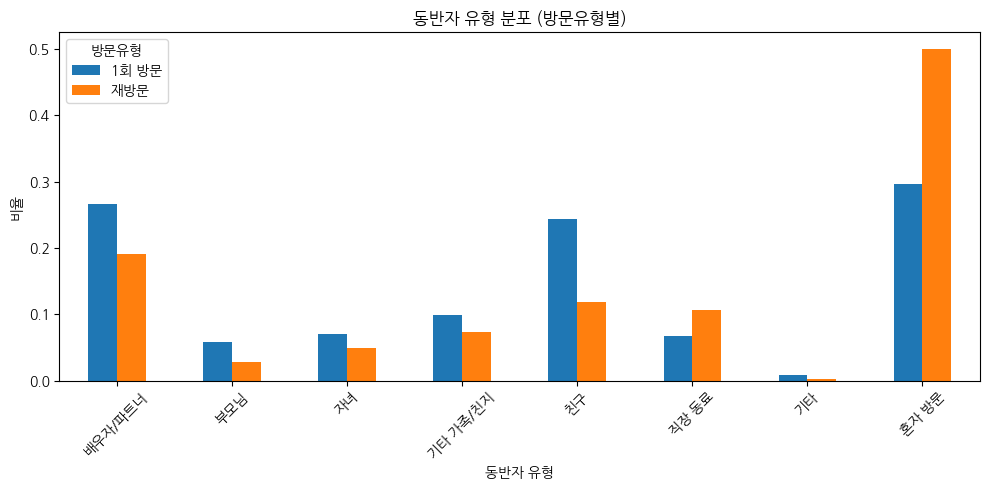

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 라벨 딕셔너리
companion_map = {
    'Q7a2': '배우자/파트너',
    'Q7a3': '부모님',
    'Q7a4': '자녀',
    'Q7a5': '기타 가족/친지',
    'Q7a6': '친구',
    'Q7a7': '직장 동료',
    'Q7a8': '기타'
}
companion_cols = list(companion_map.keys())

# 2. 결과 저장용 dict
results = {}

# 3. visit_type별 분포 계산
for group in ['1회 방문', '재방문']:
    subset = df_sh[df_sh['visit_type'] == group]

    # 각 동반자 유형별 비율
    counts = {companion_map[col]: subset[col].notna().mean() for col in companion_cols}
    # 혼자 방문은 모든 항목이 결측일 때
    counts['혼자 방문'] = subset[companion_cols].isna().all(axis=1).mean()

    results[group] = pd.Series(counts)

# 4. 데이터프레임으로 변환
df_companion = pd.DataFrame(results).round(3)

# 5. 시각화
df_companion.plot(kind='bar', figsize=(10, 5), title='동반자 유형 분포 (방문유형별)')
plt.ylabel("비율")
plt.xlabel("동반자 유형")
plt.xticks(rotation=45)
plt.legend(title="방문유형")
plt.tight_layout()
plt.show()


In [ ]:
print(df_sh.columns.tolist())


['pnid', 'MVIT', 'RVIT', 'XRVIT', 'TYP', 'Q1', 'Q1_1a1', 'Q1_1a2', 'Q1_1a3', 'Q2a1', 'Q2a2', 'Q2a3', 'Q2a_dk', 'Q2_1a1', 'Q2_1a2', 'Q2_1a3', 'ZQ2_31', 'ZQ2_32', 'ZQ2_33', 'ZQ2_34', 'Q2_3a2at', 'Q2_3a2bt', 'Q2_3a2ct', 'Q2_3a2dt', 'Q2_3a2et', 'Q2_3a3at', 'Q2_3a3bt', 'Q2_3a3ct', 'Q2_3a3dt', 'Q2_3a3et', 'Q2_3b2a', 'Q2_3b2b', 'Q2_3b2c', 'Q2_3b2d', 'Q2_3b2e', 'Q2_3b3a', 'Q2_3b3b', 'Q2_3b3c', 'Q2_3b3d', 'Q2_3b3e', 'Q3_1a1', 'Q3_1a2', 'Q3_1a3', 'Q3_2a1', 'Q3_2a2', 'Q3_2a3', 'Q4a1', 'Q4a2', 'Q4a3', 'Q4a_dk', 'Q4_1a1', 'Q4_1a2', 'Q4_1a3', 'Q4_2a1', 'Q4_2a2', 'Q4_2a3', 'Q4_2a_dk', 'Q5', 'Q5_1a01', 'Q5_1a02', 'Q5_1a03', 'Q5_1a04', 'Q5_1a05', 'Q5_1a06', 'Q5_1a07', 'Q5_1a08', 'Q5_1a09', 'Q5_1a10', 'Q5_1a_dk', 'Q6', 'Q6_1', 'Q6_1R', 'Q7A', 'Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8', 'MQ7_1', 'MQ7_1제외', 'MQ7_2', 'MQ7_1$15제외', 'MQ7_1제외$15제외', 'RQ7_1', 'RQ7_1제외', 'RQ7_2', 'RQ7_1$15제외', 'RQ7_1제외$15제외', 'Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a08', 'Q8a09', 


📌 1회 방문 - 여행 전 정보 수집 경로
인터넷 사이트/앱         0.795
자국 여행사(오프라인)      0.061
언론매체(TV, 신문 등)    0.225
친지/친구/동료          0.597
관광 안내 서적          0.183
항공사, 호텔           0.133
자국 공공기관           0.071
기타                0.004
Name: count, dtype: float64


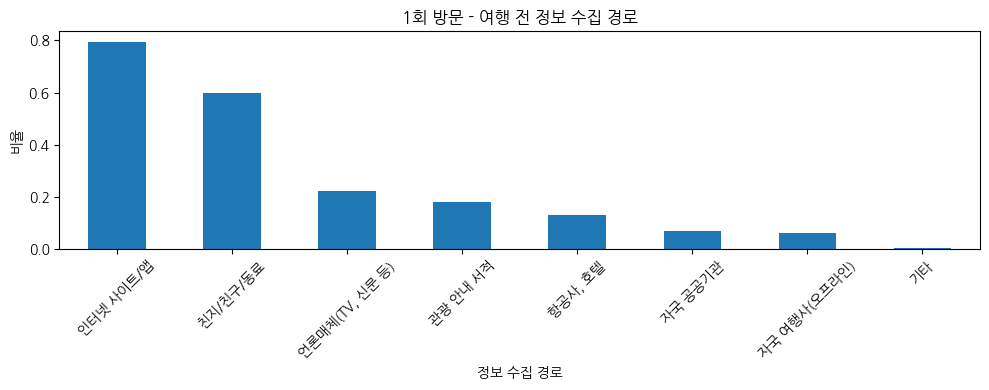


📌 재방문 - 여행 전 정보 수집 경로
인터넷 사이트/앱         0.610
자국 여행사(오프라인)      0.055
언론매체(TV, 신문 등)    0.170
친지/친구/동료          0.639
관광 안내 서적          0.095
항공사, 호텔           0.170
자국 공공기관           0.071
기타                0.009
Name: count, dtype: float64


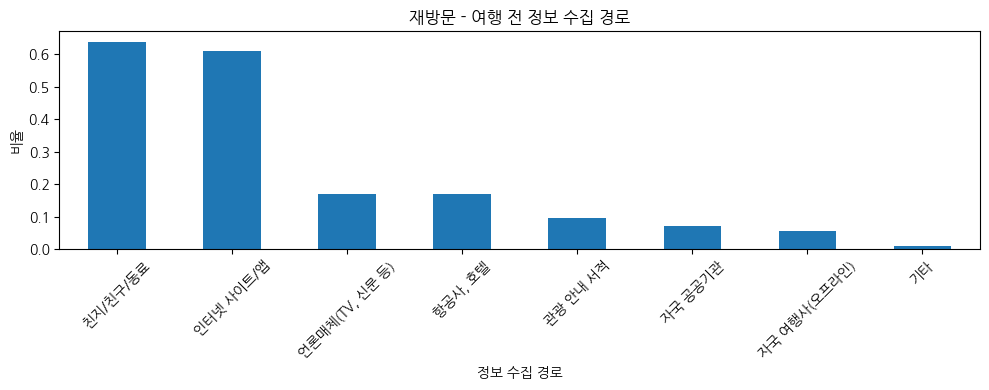

In [ ]:
import matplotlib.pyplot as plt

# Q4a 관련 변수와 라벨 매핑
q4a_cols = ['Q4a1', 'Q4a2', 'Q4a3']
q4a_map = {
    1: '인터넷 사이트/앱',
    2: '자국 여행사(오프라인)',
    3: '언론매체(TV, 신문 등)',
    4: '친지/친구/동료',
    5: '관광 안내 서적',
    6: '항공사, 호텔',
    7: '자국 공공기관',
    8: '기타',
    9: '정보를 얻지 않았다'
}

# 분석 함수
def plot_ranked_multiple(df, cols, code_map, title_prefix):
    for group in ['1회 방문', '재방문']:
        subset = df[df['visit_type'] == group]
        combined = pd.concat([subset[col] for col in cols])
        counts = combined.value_counts().sort_index()
        counts.index = counts.index.map(code_map)
        counts = (counts / len(subset)).round(3)

        # 출력
        print(f"\n📌 {group} - {title_prefix}")
        print(counts)

        # 시각화
        counts.sort_values(ascending=False).plot(
            kind='bar',
            title=f'{group} - {title_prefix}',
            figsize=(10, 4)
        )
        plt.ylabel('비율')
        plt.xlabel('정보 수집 경로')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_ranked_multiple(df_sh, q4a_cols, q4a_map, '여행 전 정보 수집 경로')




📌 1회 방문 - 주요 이용 사이트
글로벌 포털사이트      0.456
한국 포털사이트       0.112
자국 포털사이트       0.079
여행전문 사이트/앱     0.220
소셜미디어          0.448
동영상 사이트        0.348
여행 관련 블로그      0.168
여행사 홈페이지       0.041
관광지 홈페이지       0.073
항공사/호텔 홈페이지    0.091
공공기관 홈페이지      0.085
기타             0.002
Name: count, dtype: float64


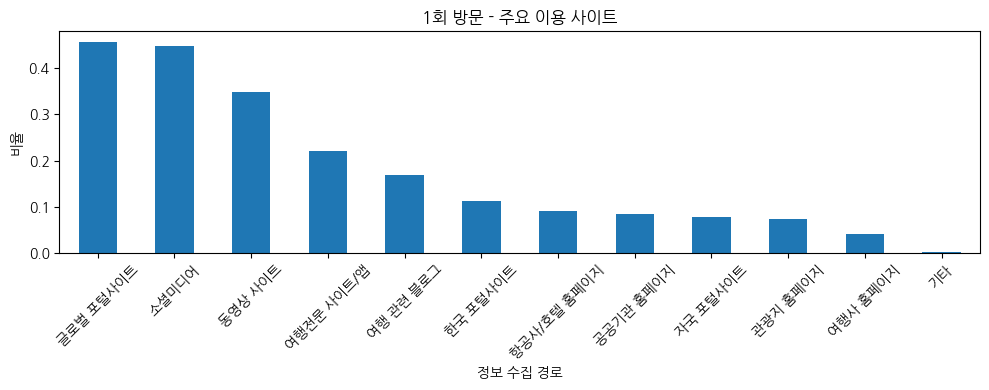


📌 재방문 - 주요 이용 사이트
글로벌 포털사이트      0.354
한국 포털사이트       0.111
자국 포털사이트       0.058
여행전문 사이트/앱     0.136
소셜미디어          0.300
동영상 사이트        0.266
여행 관련 블로그      0.085
여행사 홈페이지       0.027
관광지 홈페이지       0.042
항공사/호텔 홈페이지    0.101
공공기관 홈페이지      0.072
기타             0.002
Name: count, dtype: float64


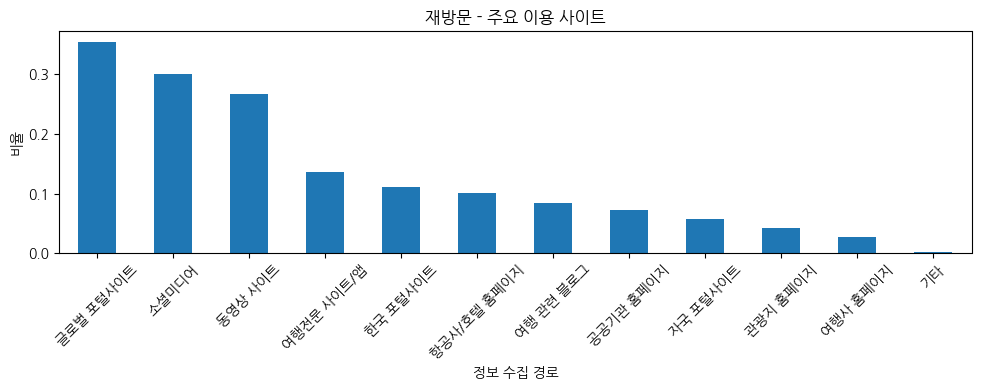

In [ ]:
q4_1a_cols = ['Q4_1a1', 'Q4_1a2', 'Q4_1a3']

q4_1a_map = {
    1: '글로벌 포털사이트',
    2: '한국 포털사이트',
    3: '자국 포털사이트',
    4: '여행전문 사이트/앱',
    5: '소셜미디어',
    6: '동영상 사이트',
    7: '여행 관련 블로그',
    8: '여행사 홈페이지',
    9: '관광지 홈페이지',
    10: '항공사/호텔 홈페이지',
    11: '공공기관 홈페이지',
    12: '기타'
}

plot_ranked_multiple(df_sh, q4_1a_cols, q4_1a_map, '주요 이용 사이트')




📌 1회 방문 - 부족했던 정보
방문지 정보        0.163
교통정보          0.270
음식 및 맛집 정보    0.207
쇼핑 정보         0.083
숙박 정보         0.092
축제/행사 정보      0.223
한류 문화체험 정보    0.099
금융 정보         0.215
통신 정보         0.162
기타            0.007
Name: count, dtype: float64


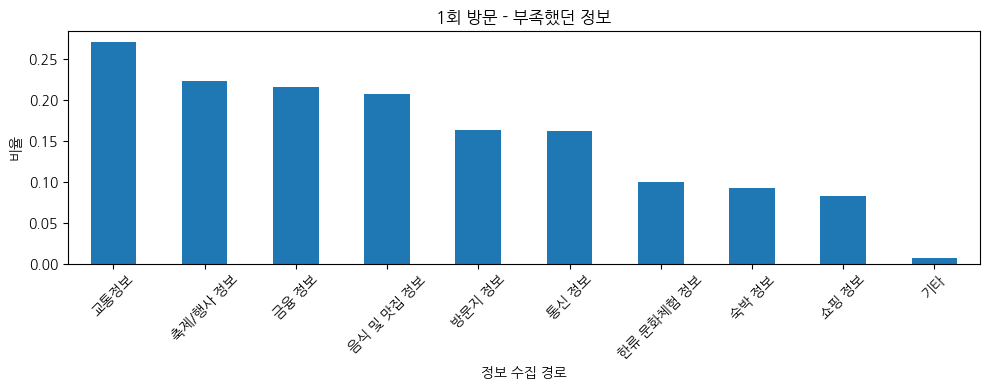


📌 재방문 - 부족했던 정보
방문지 정보        0.104
교통정보          0.189
음식 및 맛집 정보    0.134
쇼핑 정보         0.076
숙박 정보         0.084
축제/행사 정보      0.170
한류 문화체험 정보    0.053
금융 정보         0.164
통신 정보         0.126
기타            0.012
Name: count, dtype: float64


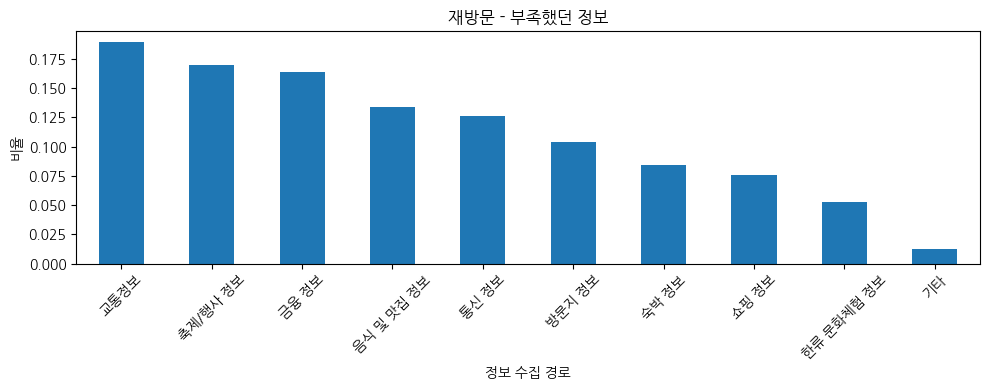

In [ ]:
q4_2a_cols = ['Q4_2a1', 'Q4_2a2', 'Q4_2a3']

q4_2a_map = {
    1: '방문지 정보',
    2: '교통정보',
    3: '음식 및 맛집 정보',
    4: '쇼핑 정보',
    5: '숙박 정보',
    6: '축제/행사 정보',
    7: '한류 문화체험 정보',
    8: '금융 정보',
    9: '통신 정보',
    10: '기타',
    11: '없다'
}

plot_ranked_multiple(df_sh, q4_2a_cols, q4_2a_map, '부족했던 정보')